# Introduction

This is the first notebook of the loan default prediction project. This notebook focuses on doing deep Exploratory Data Analysis of the main table in our dataset: application. This table contains various information about the loan and the client that applied for it. In addition, we have the target feature, which indicates whether a client defaulted on the loan.

## Overview of the analysed data:
* Number of observations: 307511
* Number of features: 122. The feature contains information about the loan and client's characteristics such as their financial, employment, demographic situation.

## Conclusion of the EDA
1. **Dataset imbalance**. Unsuprisingly, there is only small part of clients who defaulted(8.1%).
2. **Columns with a lot of missing data**. 
    * Big number of columns had more than 50% of missing values. These columns were related to different characteristics of the building where client lives. Considering the irrelevance of these columns, the decision was to drop them, as they could introduce noise to our models.
3. **Financial Situation of Clients:**
    * Several columns related to the financial situation of clients contain a significant number of outliers, some of which were removed
    * Clients who have defaulted tend to have lower incomes on average.
    * There appears to be minimal difference between the annuity, amount of credit, and price of goods columns in relation to the target variable (default risk).
    * The "Price of Goods" feature has some number of missing data. The target variable for people, where this column is missing, is statistically significant different from others.
    * Interestingly, the "Price of Goods" column is almost perfectly correlated with "Income."
    * The correlation between numeric features and the target variable (default) is generally weak.
    * A strong association exists between the type of loan and default risk: individuals who took cash loans have a much higher default rate compared to those who took revolving loans.
4. **Employment Status of Clients:**
    * There are notable gaps in data for "Occupation Type," "Organization Type," and "Years of Employment," especially among clients who are unemployed or pensioners.
    * The "Income Type" feature includes categories such as "Businessman" and "Commercial Associate," with the "Commercial Associate" category having over 70,000 occurrences.
    * The occupation group with the highest default risk is "Low-skill Laborers," with a 17% default rate.
    * "Organization Type" also reveals interesting patterns, with some categories differing only by type (e.g., "Business Entity Type 1" vs. "Business Entity Type 2").
    * "Years of Employment" shows promise as a predictor, with clients having longer employment histories generally displaying a significantly lower chance of default.
    * Clients in the medical field tend to have the longest tenures at their current jobs, averaging more than 10 years.
5. **Demographic Factors:**
    * Age plays a significant role in default risk, with younger clients exhibiting a higher likelihood of default. Clients who did not default tend to be older on average.
    * A noteworthy observation is the group of pensioners under 40, who show a default rate exceeding 10%.
    * Gender is another important factor: men have a higher default rate (10%) compared to women (7%).
    * Family status influences default risk as well, with single, separated, or people in civil marriages having higher default rates.
    * Education level is inversely related to default risk; individuals with higher levels of education tend to have a lower chance of default, while those with lower secondary education exhibit the highest default rate.
    * Housing type is associated with default risk: people living in rented apartments or with parents have a higher chance of default.
    * Clients with more children also have a higher likelihood of default.
    * Interestingly, clients from more populated regions tend to have a lower default risk, on average.
6. **Social Surroundings:**
    * While most clients do not have acquaintances involved in late payments or defaults, those who do tend to have a higher risk of default themselves.
7. **Bureau Enquiries:**
    * Bureau enquiries are relatively infrequent, and there is weak correlation between these features and the target variable.
    * Missing data in the bureau enquiry columns often corresponds with the absence of related data in the bureau.csv table, suggesting that these missing values may be due to the clients not being evaluated by the credit bureau.
8. **External Credit Scores:**
    * External score columns show a moderate correlation with the target variable, making them valuable predictors for loan default risk.
    * However, many of these columns contain missing data, particularly for clients who are pensioners or unemployed.
9. **Indicator Columns:**
    * Indicator columns with very low variance were excluded from the analysis, as they provide little to no value for prediction.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import scipy.stats as stats
import sys
import os
sys.path.append(os.path.abspath('..'))
from utils.preprocessing import helper_functions

In [2]:
application = pd.read_csv("../datasets/application_train.csv")
application_test = pd.read_csv("../datasets/application_test.csv")
bureau = pd.read_csv("../datasets/bureau.csv")

In [3]:
application.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  

[1 rows x 122 columns]

In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
application.shape

(307511, 122)

In [6]:
application["SK_ID_CURR"].is_unique

True

**Distribution of the target variable**

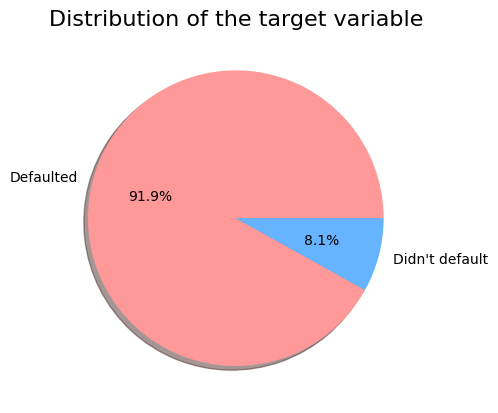

In [7]:
target_count = application["TARGET"].value_counts()
plt.pie(target_count, shadow=True, 
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'],
       labels=["Defaulted", "Didn't default"])
plt.title("Distribution of the target variable", fontsize=16);

Out target variable is highly imbalanced. Only 8.1% of people defaulted.

**Check for missing data:**

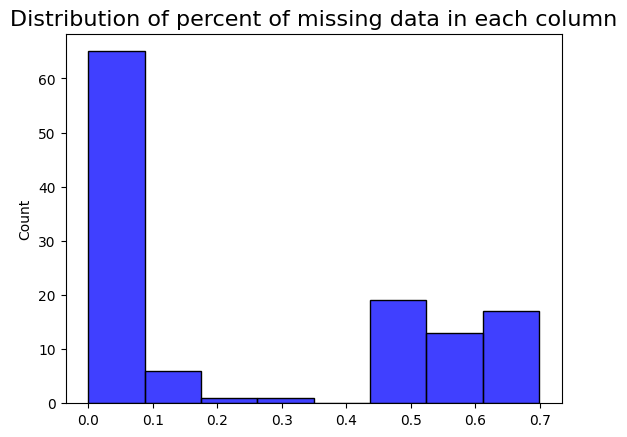

In [8]:
missing_values = application.isnull().sum()
missing_values_pct = missing_values / len(application)
sns.histplot(missing_values_pct, color="blue")
plt.title("Distribution of percent of missing data in each column", fontsize=16);

Extract columns with > 20% of missing values:

In [9]:
most_missing_values = missing_values_pct[missing_values_pct > 0.2]
most_missing_values.sort_values(ascending=False)

COMMONAREA_AVG                  0.698723
COMMONAREA_MEDI                 0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

Columns that have > 20% missing entries are related to the building information of the client. There is also type of occupation and score from external source.

Let's dumify categorical columns and look into correlations with the target variable

In [10]:
most_empty_cols = list(most_missing_values.index)
apps_miss_cols = application[most_empty_cols + ["TARGET"]]

miss_cat_cols = apps_miss_cols.select_dtypes("object").columns
apps_miss_cols = pd.concat([apps_miss_cols, 
                            pd.get_dummies(apps_miss_cols[miss_cat_cols])], 
                           axis=1)
apps_miss_cols.drop(columns=miss_cat_cols,
                    inplace=True)

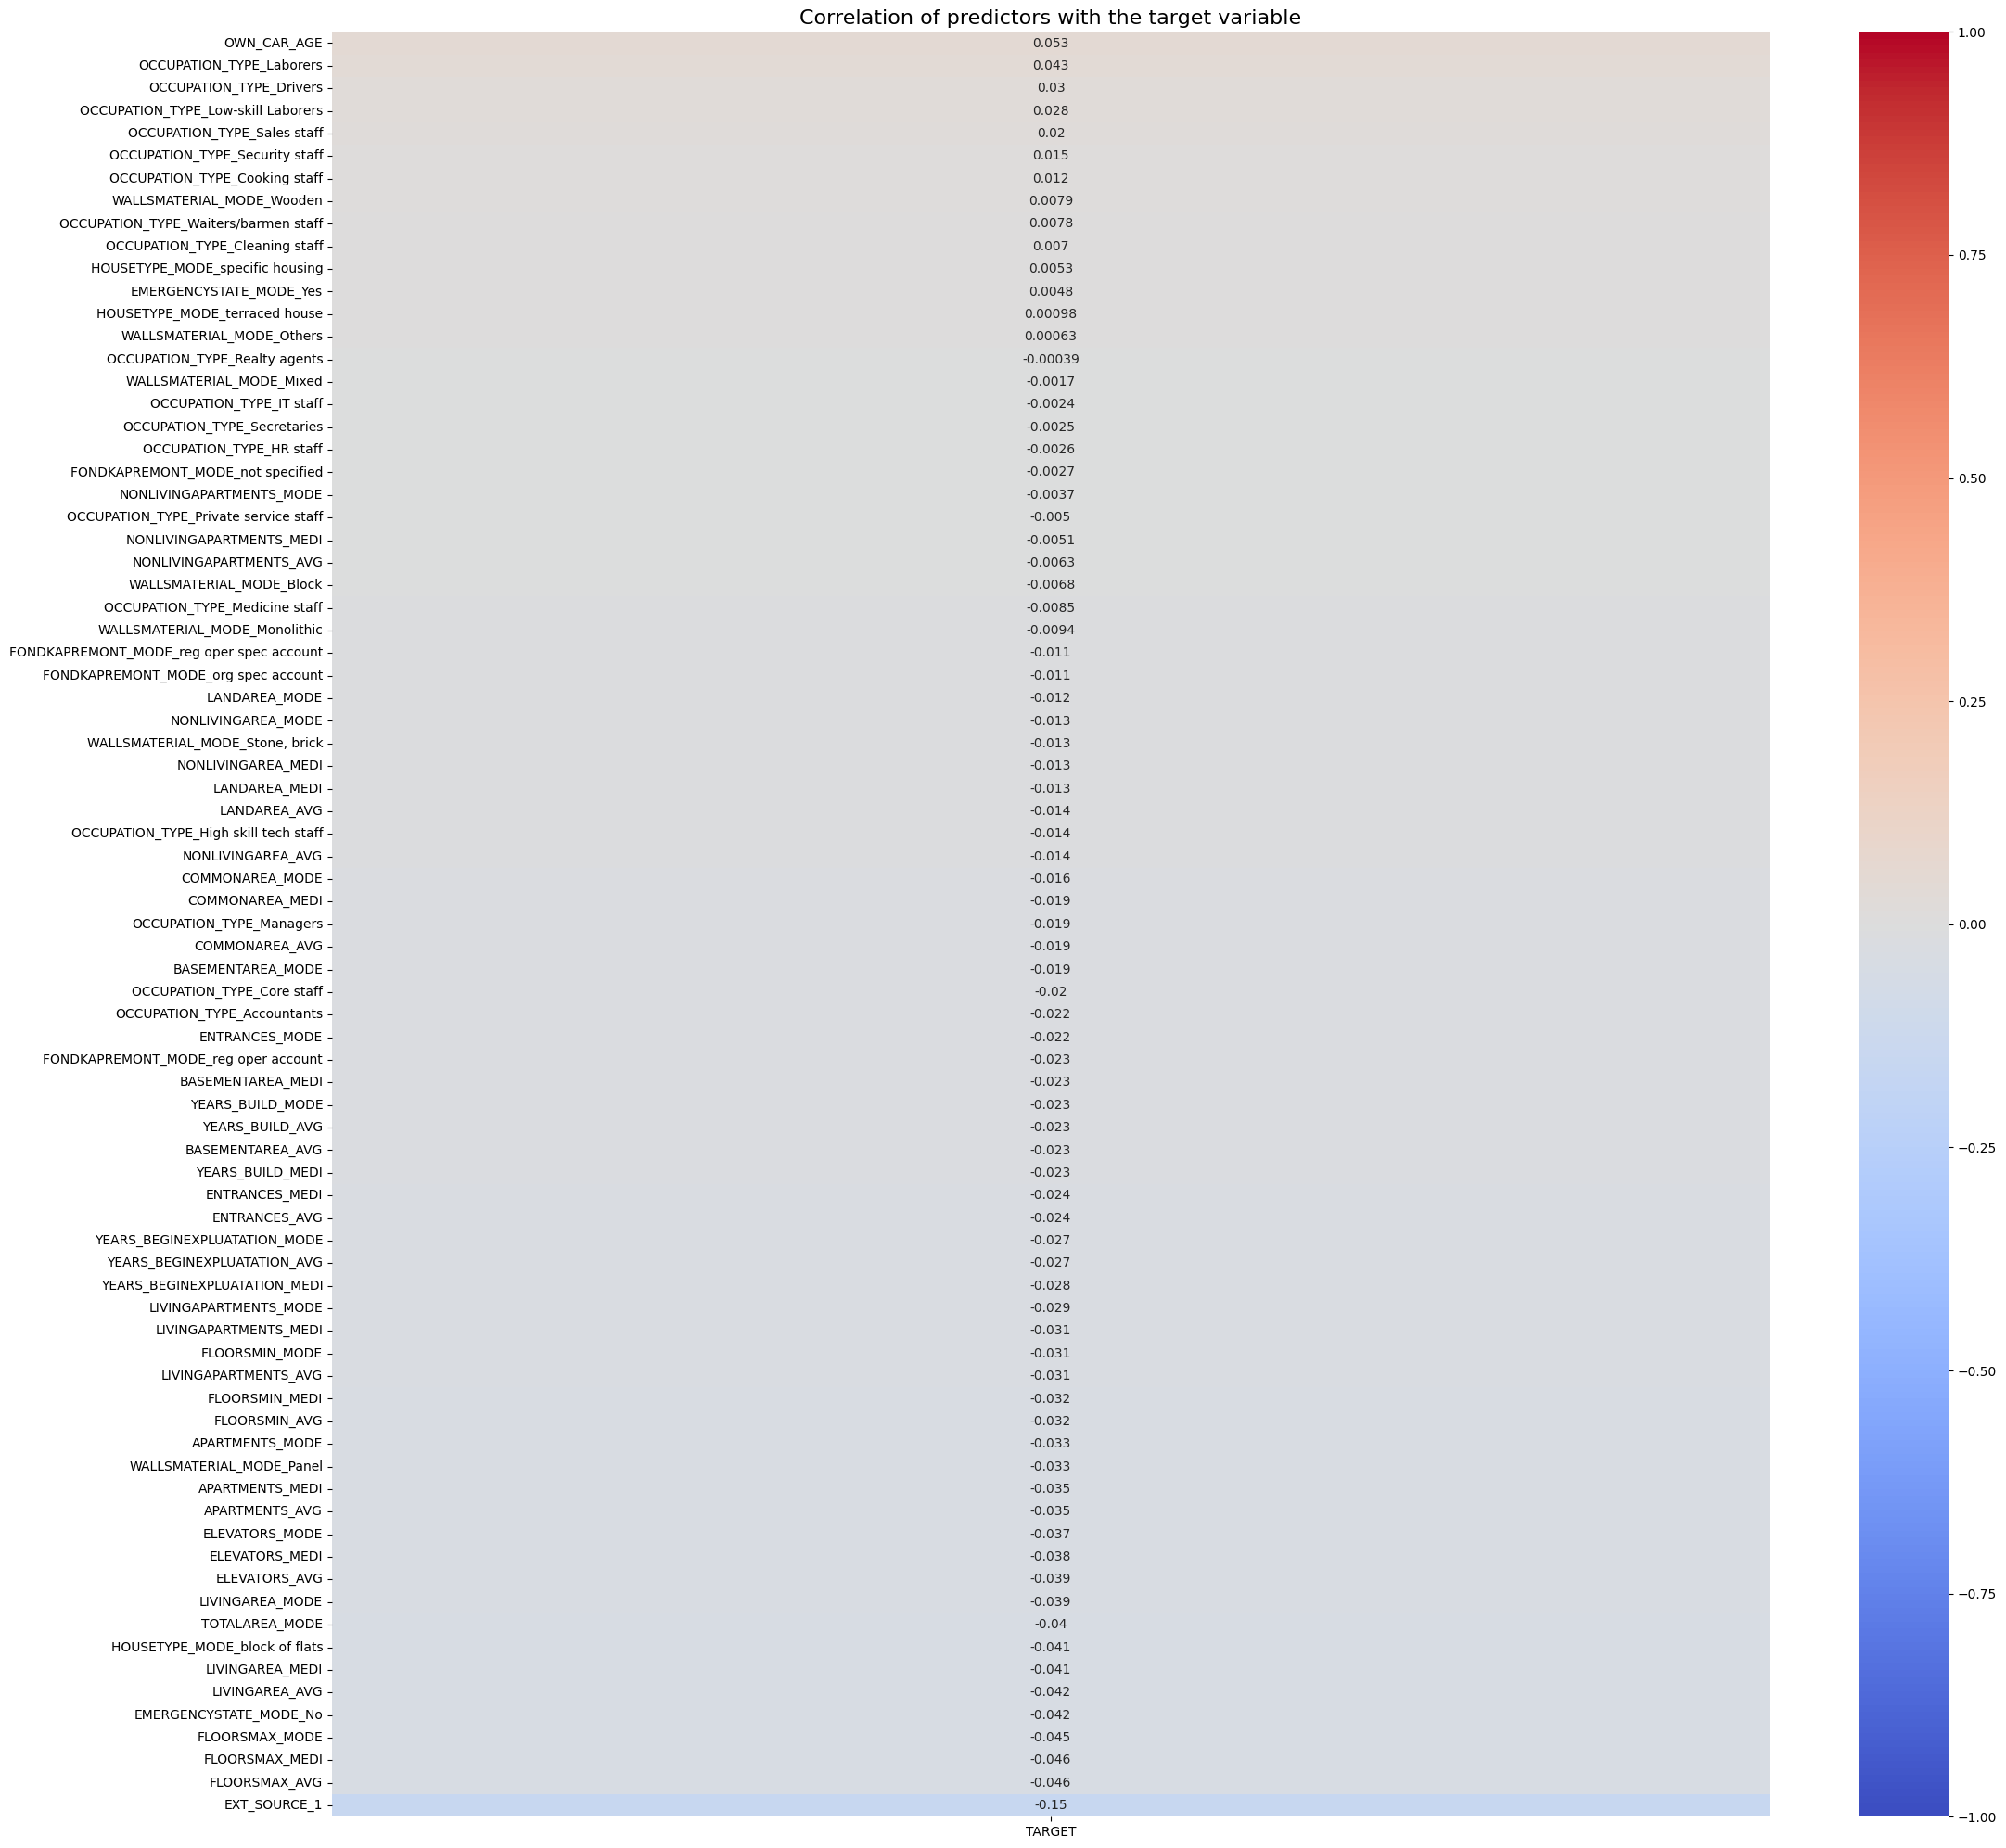

In [11]:
plt.figure(figsize=(25, 25))

heatmap = sns.heatmap(
    apps_miss_cols.corr("spearman")[["TARGET"]]
    .sort_values(by="TARGET", ascending=False).drop("TARGET"),
    vmin=-1,
    vmax=1,
    annot=True, 
    cmap="coolwarm"
)
heatmap.set_title("Correlation of predictors with the target variable",
                 fontsize=16);

We will drop almost all the columns with > 20% of missing data. The reasons are that all of these columns have around 50% of missing data and their relevance to the problem is small.

Columns that won't be dropped:
* EXT_SOURCE_1: score from 1 external source. Despite a lot of missing data, we have 2 other similar columns. Likewise, the column is correlated with the target variable
* OCCUPATION_TYPE: this column also could have some predicting power. We also have to analyse the reasons behind missing data there.

In [12]:
most_empty_cols.remove("EXT_SOURCE_1")
most_empty_cols.remove("OCCUPATION_TYPE")
columns_to_drop = most_empty_cols
application = application.drop(columns=columns_to_drop)
application_test = application_test.drop(columns=columns_to_drop)

Let's check binary columns(flag if the person provided some document or something else):

In [13]:
pd.set_option('future.no_silent_downcasting', True)
indicator_cols = [col for col in application.columns 
                  if col.startswith("FLAG_") or col.startswith("REG_")
                 or col.startswith("LIVE_")]
application[indicator_cols] = (application[indicator_cols]
                               .replace({"Y": 1, "N": 0}))
application_test[indicator_cols] = (application_test[indicator_cols]
                                    .replace({"Y": 1, "N": 0}))
application[indicator_cols].isnull().sum().value_counts()

0    34
Name: count, dtype: int64

No missing data in indicator columns

Check unique values in categorical columns:

In [14]:
helper_functions.print_unique_values_for_cat_columns(application);

---------------------------------------------
NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
---------------------------------------------
CODE_GENDER
['M' 'F' 'XNA']
---------------------------------------------
FLAG_OWN_CAR
[0 1]
---------------------------------------------
FLAG_OWN_REALTY
[1 0]
---------------------------------------------
NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
---------------------------------------------
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
---------------------------------------------
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
---------------------------------------------
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
----------------------------

Some of the categorical columns have also missing values. Let's convert them to nan to be able to check for missing data again.

In [15]:
application.replace({"Unknown": np.nan}, inplace=True)
application.replace({"XNA": np.nan}, inplace=True)

application_test.replace({"Unknown": np.nan}, inplace=True)
application_test.replace({"XNA": np.nan}, inplace=True)

Check numeric columns for outliers

In [16]:
surround_cols = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                 "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
application_test[surround_cols].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              48715.000000              48715.000000   
mean                   1.447644                  0.143652   
std                    3.608053                  0.514413   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  354.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count              48715.000000              48715.000000  
mean                   1.435738                  0.101139  
std                    3.580125                  0.403791  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  351.000000                 24.000000

Numeric columns regarding surrounding of the client have two outliers with extremely high values. Both of the rows have 0 in their target variable. We will drop these rows as they could skew our distributions and mislead the model.

In [17]:
application = application[~(application["OBS_30_CNT_SOCIAL_CIRCLE"] > 300)]

In [18]:
ext_source_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
application[ext_source_cols].describe()

EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  134132.000000  3.068500e+05  246545.000000
mean        0.502131  5.143934e-01       0.510854
std         0.211063  1.910601e-01       0.194845
min         0.014568  8.173617e-08       0.000527
25%         0.334007  3.924574e-01       0.370650
50%         0.505998  5.659641e-01       0.535276
75%         0.675055  6.636171e-01       0.669057
max         0.962693  8.549997e-01       0.896010

Each of the EXT_SOURCE columns seem to not have outliers. These columns are very similar

In [19]:
bureau_enq_cols = [col for col in application if col.startswith("AMT_R")]
application[bureau_enq_cols].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265991.000000              265991.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110758   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265991.000000              265991.000000   
mean                     0.034358                   0.267393   
std                      0.204677                   0.916003   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265991.000000               265991.000000  
mean                    0.265475                    1.899970  
std                     0.794057                    1.869297  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

One row has extremely high value in number of enquiries 3 months before the application. Again, we will drop this row as it will skew our distributions

In [20]:
application = application[~(application["AMT_REQ_CREDIT_BUREAU_QRT"] > 30)]

In [21]:
other_numeric_cols = ~application.columns.isin(
    bureau_enq_cols+ext_source_cols+surround_cols+indicator_cols+["SK_ID_CURR"])
application.loc[:, other_numeric_cols].describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307509.000000  307509.000000      3.075090e+05  3.075090e+05   
mean        0.080729       0.417051      1.687972e+05  5.990259e+05   
std         0.272419       0.722123      2.371237e+05  4.024906e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307497.000000     3.072310e+05               307509.000000   
mean    27108.622118     5.383958e+05                    0.020868   
std     14493.746450     3.694460e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307509.000000  307509.000000      307509.000000    307509.000000   
mean   -16037.022295   63815.478032       -4986.133456     -2994.203724   
std      4363.987508  141276.124313        3522.893612      1509.454737   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7480.000000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307507.000000         307509.000000                307509.000000   
mean          2.152666              2.052460                     2.031518   
std           0.910681              0.509033                     0.502736   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  DAYS_LAST_PHONE_CHANGE  
count            307509.000000           307508.000000  
mean                 12.063406             -962.860622  
std                   3.265814              826.810863  
min                   0.000000            -4292.000000  
25%                  10.000000            -1570.000000  
50%                  12.000000             -757.000000  
75%                  14.000000             -274.000000  
max                  23.000000                0.000000

In 3 columns, there are values that doesn't make sense:
* DAYS_EMPLOYED: 365243.00. In the data description, it is specified that this is a missing value
* DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH 0. It doesn't make sense to think that the person hasn't ever changed their identity document or phone. Therefore, we will consider these values as missing.

In [22]:
for dataset in [application, application_test]:
    dataset.loc[dataset["DAYS_EMPLOYED"] == 365243.00, 
                    "DAYS_EMPLOYED"] = np.nan
    dataset.loc[dataset["DAYS_LAST_PHONE_CHANGE"] == 0, 
                    "DAYS_LAST_PHONE_CHANGE"] = np.nan
    dataset.loc[dataset["DAYS_ID_PUBLISH"] == 0, 
                    "DAYS_ID_PUBLISH"] = np.nan

Check how many missing values rows have:

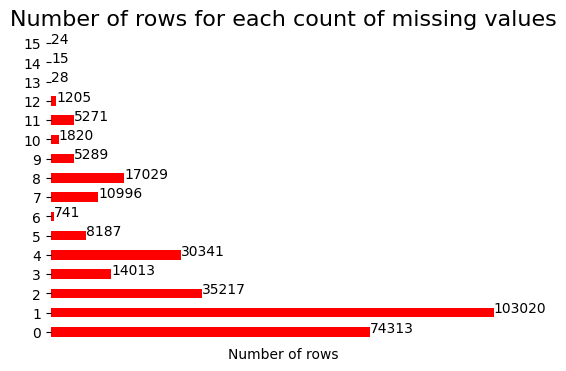

In [23]:
helper_functions.plot_missing_values_by_row(application)

Usually rows have around 1-3 missing entries. Therefore, no rows need to be dropped.

In [24]:
bureau_enq_cols = [col for col in application if col.startswith("AMT_R")]
ext_source_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
for col_group in [bureau_enq_cols, ext_source_cols, surround_cols]:
    print(helper_functions.missing_values_pattern(application, col_group))

0    265990
6     41519
Name: count, dtype: int64
1    161012
0    109588
2     36737
3       172
Name: count, dtype: int64
0    306488
4      1021
Name: count, dtype: int64


All the columns related to enquiries to Credit Bureau have missing values in exactly the same columns. This means that for 41519 customers, there is no information about these enquiries. 

Only for 172 customers, there is absolutely no data about their score from external source.

Also, for columns, related to surroundings of the client, there is missing data either for all columns, or for 0 columns

Before EDA, fill missing data in categorical columns with 'UNKNOWN' values.

In [25]:
cat_cols = application.select_dtypes("object").columns
application[cat_cols] = (application[cat_cols].fillna("UNKNOWN"))
application_test[cat_cols] = (application_test[cat_cols].fillna("UNKNOWN"))

# Exploratory data analysis

We will go through each group of columns:
1. **Financial situation of the borrower:**
    * Income of the client
    * Amount of the credit
    * Amount of the annuity
    * Price of the goods for which the credit was given
    * Type of the loan
2. **Employment status of the client:**
    * Occupation type of the client
    * Income type of the client
    * Organization type of the client
    * Number of years the client has been employed for
3. **Demographic Factors:**
    * Age of the client
    * Gender
    * Who the client was accompannied
    * Education type of the client
    * Family status
    * Housing type
    * Number of children
    * Number of family members
    * Rating and population of the region the client lives in
4. **Surroundings of the client:**
    * Number of client's social surroundings with observable 30 DPD (days past due) default
    * Number of client's social surroundings with observable 60 DPD (days past due) default
    * Number of client's social surroundings defaulted on 60 (days past due) DPD
    * Number of client's social surroundings defaulted on 30 (days past due) DPD
5. **Bureau enquiries about the client**
    * Number of enquiries to Credit Bureau about the client one hour before application
    * Number of enquiries to Credit Bureau about the client one day before application
    * Number of enquiries to Credit Bureau about the client one week before application
    * Number of enquiries to Credit Bureau about the client one month before application
    * Number of enquiries to Credit Bureau about the client three months before application
    * Number of enquiries to Credit Bureau about the client one year before application
6. **Scores from external sources**
7. **Indicator columns which marks whether a client provided some document or object**

### Financial situation of the borrower

**Income of the client:**

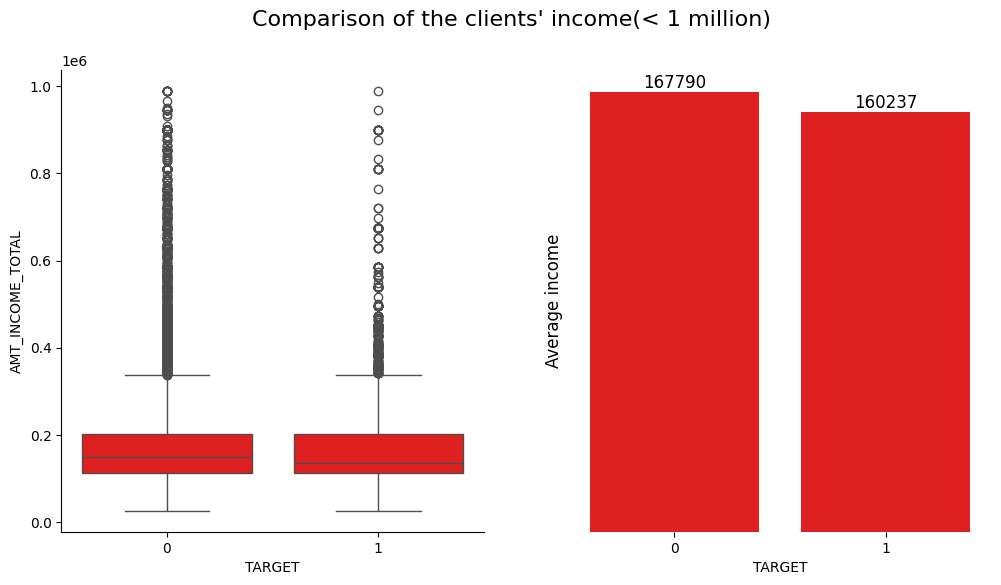

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
under_million_income = application[application["AMT_INCOME_TOTAL"] < 1000000]
plt.suptitle("Comparison of the clients' income(< 1 million)", fontsize=16)
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", color="red",
            data=under_million_income, ax=ax[0])
sns.barplot(x="TARGET", y="AMT_INCOME_TOTAL", color="red",
            data=under_million_income, ax=ax[1], errorbar=None)
sns.despine()
helper_functions.customize_bar(axes=ax[1], position="v")
ax[1].set_ylabel("Average income", fontsize=12);

Regarding the clients, whose income is under 1 million, there seems to be small difference in average income. Those, who didn't default, earn a bit more. However, there are a lot of outliers, who defaulted.

Clients, who make more than 1 million:

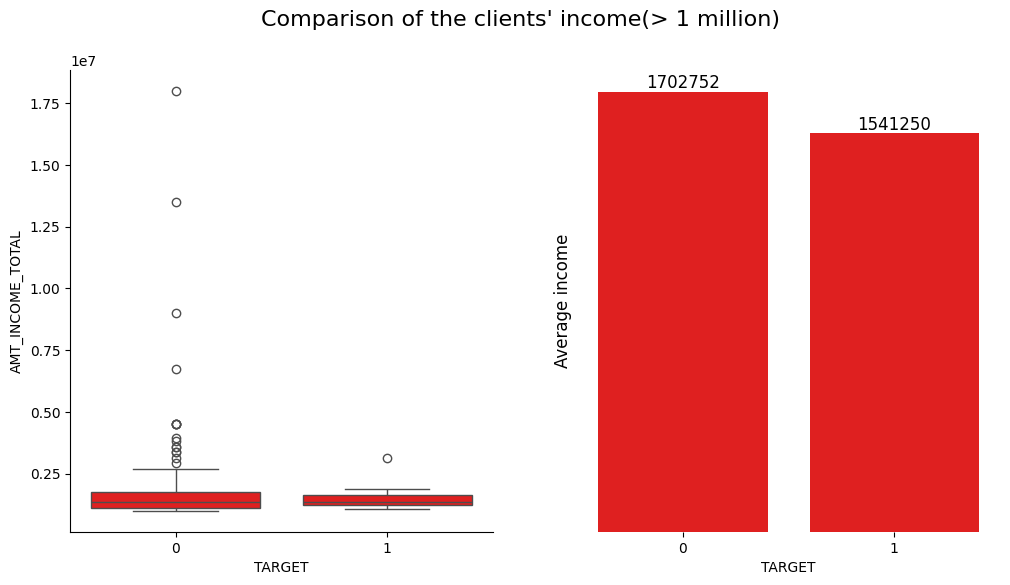

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
outliers_income = application[(application["AMT_INCOME_TOTAL"] >= 1000000)
                             &(application["AMT_INCOME_TOTAL"] < 110000000)]
plt.suptitle("Comparison of the clients' income(> 1 million)", fontsize=16)
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", 
            data=outliers_income, ax=ax[0], color="red")
sns.barplot(x="TARGET", y="AMT_INCOME_TOTAL", 
            data=outliers_income, ax=ax[1], color="red", errorbar=None)
sns.despine()
helper_functions.customize_bar(axes=ax[1], position="v")
ax[1].set_ylabel("Average income", fontsize=12);

Here, the situation is a bit interesting. There seems to be some difference in average income. A lot of outliers, who make significantly more than others, usually don't default.

There is one interesting client, who makes more than 110 millions:

In [28]:
application[application["AMT_INCOME_TOTAL"] >= 110000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            0   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               1             1       117000000.0    562491.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
12840      26194.5  ...                 0                0                0   

      FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                0                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                        0.0                         1.0  

[1 rows x 74 columns]

This client has defaulted on their loan. 

We will drop this row, as it significantly skews the distribution and could mislead the model

In [29]:
application = application[application["AMT_INCOME_TOTAL"] <= 110000000]

**Let's look into other numeric features, which are more related ot loan:**

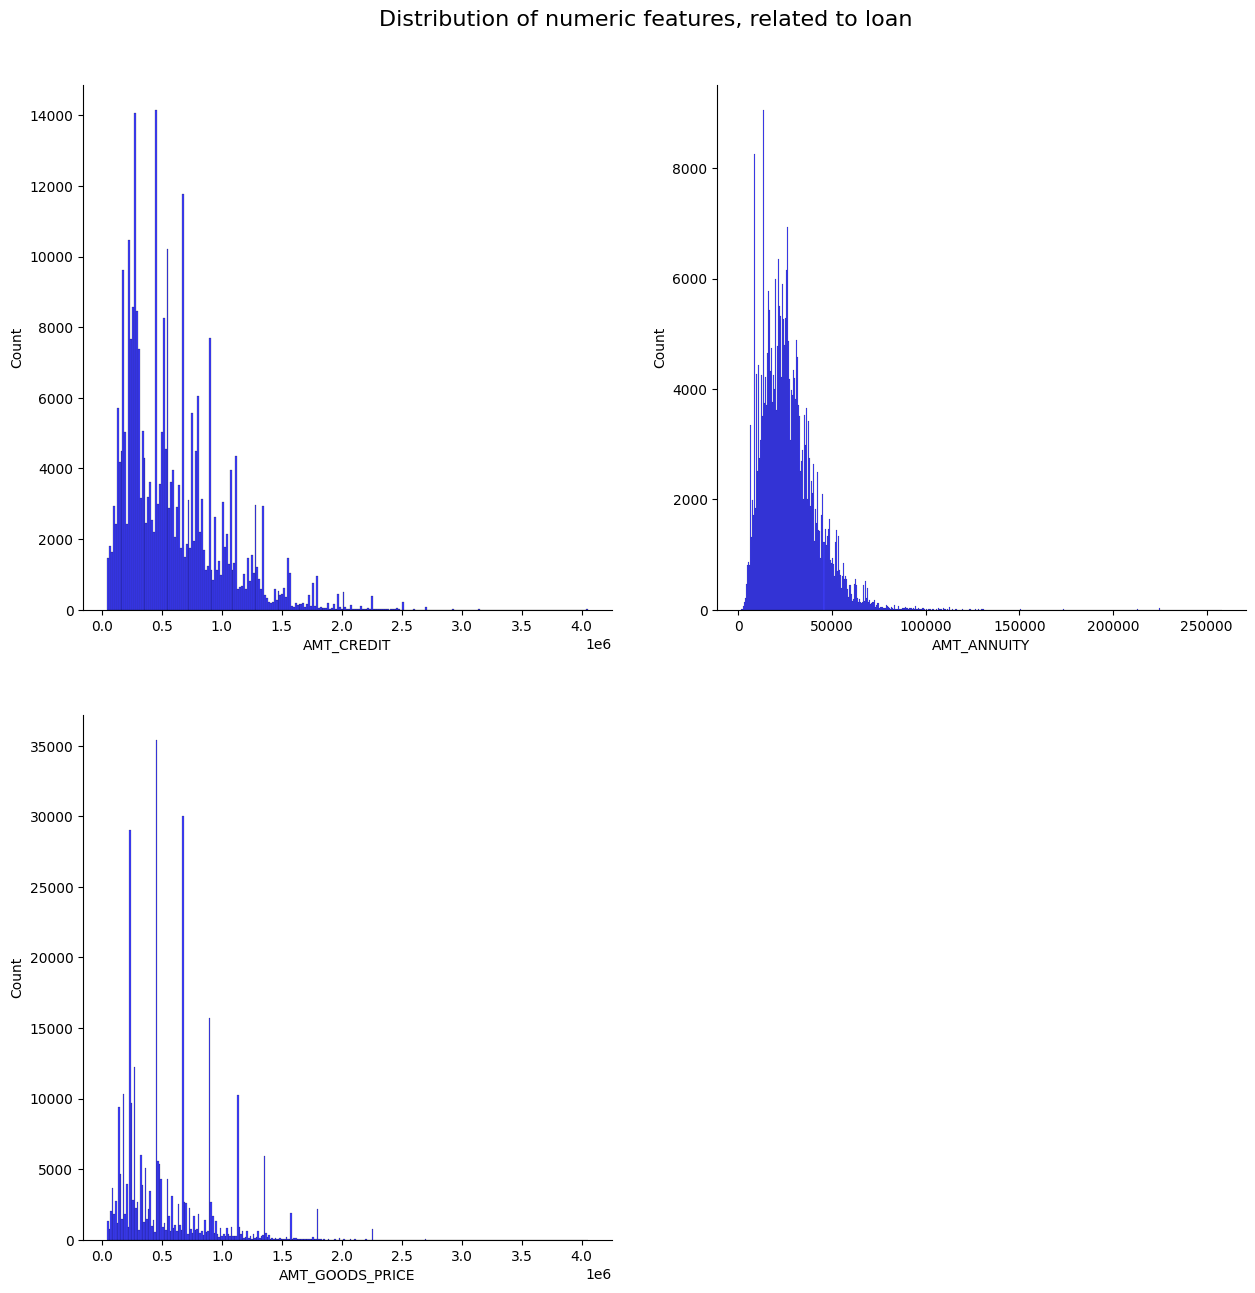

In [30]:
loan_numeric = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
helper_functions.plot_num_dist(columns=loan_numeric, data=application, 
                               figsize=(15, 15),
                               title="Distribution of numeric features, related to loan")

All of the distributions are highly right-skewed, with a lot of outliers. Each of the distribution has a lot of spikes, as well. After checking, we can say that those spikes are most frequent values that the bank offers. 

Let's compare between the target values:

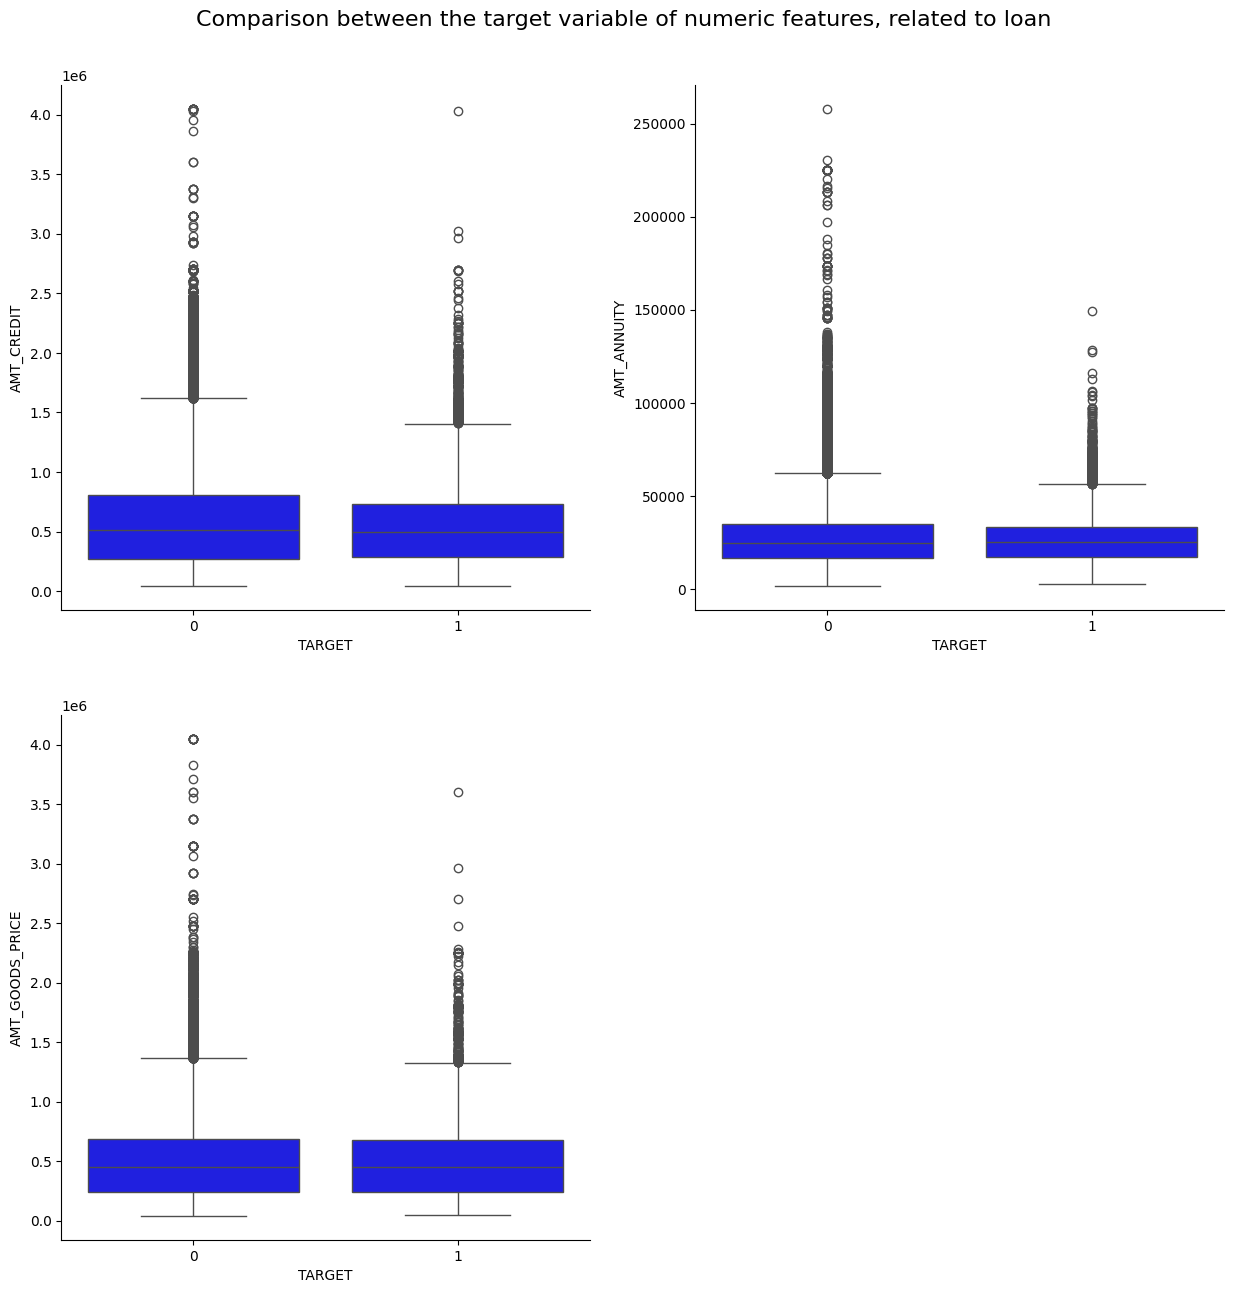

In [31]:
title = "Comparison between the target variable of numeric features, related to loan"
helper_functions.plot_num_dist(columns=loan_numeric, data=application,
                               figsize=(15, 15), title=title,
                               plot_type="box", hue="TARGET")

Throughout all of the features, the values seem to be similar.

Check rows with missing data in AMT_GOODS_PRICE column

In [32]:
missing_goods_price = application[application["AMT_GOODS_PRICE"].isnull()]
print(missing_goods_price["NAME_CONTRACT_TYPE"].unique())
print(missing_goods_price["TARGET"].mean())

['Revolving loans']
0.07553956834532374


All of the loans where AMT_GOODS_PRICE is missing are Revolving. The chance of default is 7.5% which is a bit different from the original distribution

**Statistical significance test**:

**Null hypothesis**: There is no significant difference in proportion of defaults between clients with missing price of goods column and those, where the values are not missing

**Alternative hypothesis**: There is a significant difference in proportion of defaults between clients with missing price of goods column and those, where the values are not missing

**Significance level**: 1%

We will conduct a chi-square test of independence

Before doing that, let's check whether the assumptions are met:
   * Although the Kaggle dataset does not explicitly state the sampling method used, we will assume that the data was obtained through Simple Random Sampling (SRS) for the purposes of our project.
   * Assuming that Simple Random Sampling (SRS) was employed, the observations should be independent
   * The expected frequency count in each cell of the contingency table should be at least 5. This holds.

In [33]:
non_missing_goods_price = application[~application["AMT_GOODS_PRICE"].isnull()]
print(missing_goods_price["TARGET"].value_counts())
print(non_missing_goods_price["TARGET"].value_counts())

TARGET
0    257
1     21
Name: count, dtype: int64
TARGET
0    282427
1     24803
Name: count, dtype: int64


In [34]:
contingency_table = [[21, 257], [24803, 24803]]

chi2, p_value, _, _ = chi2_contingency(contingency_table)
chi2, p_value

(197.53901033596543, 7.192687266578752e-45)

We reject our null hypothesis and conduct significant association in the target variable between rows with missing goods price and rows with no missing goods price

**Now, let's look into relationships between the above numeric features:**

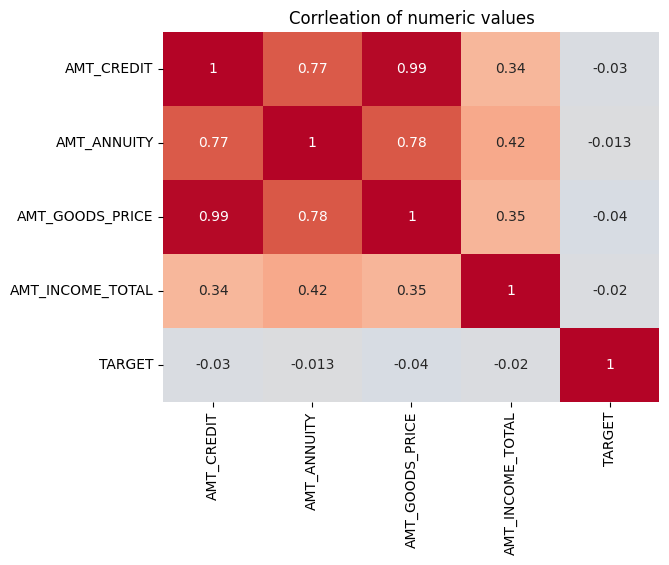

In [35]:
corr_check = application[["AMT_CREDIT", "AMT_ANNUITY", 
                         "AMT_GOODS_PRICE", "AMT_INCOME_TOTAL", "TARGET"]].corr()
sns.heatmap(corr_check, cmap="coolwarm", vmin=-1,
            vmax=1, annot=True, cbar=None)
plt.title("Corrleation of numeric values");

The loan amount is almost perfectly correlated with the price of goods feature. Also, there is strong correlation between the amount of annuity and amount of loan. 

**Let's explore relationships of type of loan with the target variable**

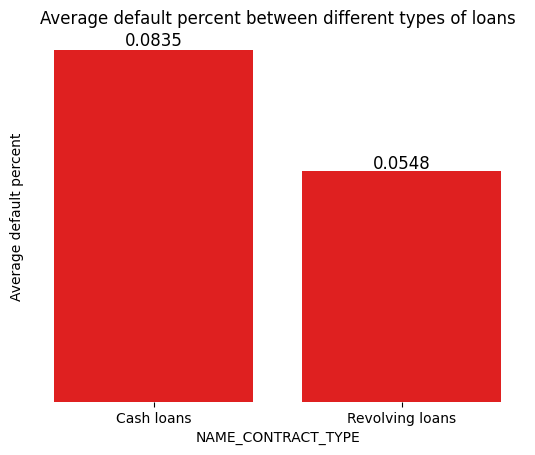

In [36]:
sns.barplot(x="NAME_CONTRACT_TYPE", data=application, 
            y="TARGET", color="red", errorbar=None)
ax = plt.gca()
helper_functions.customize_bar(axes=ax, position="v", round_to=4)
ax.set_ylabel("Average default percent")
plt.title("Average default percent between different types of loans");

People, who take cash loans have significantly higher chance of default(8.3% compared to 5.4 in Revolving loans)

## Employment status of the client

**Occupation and Income type of the clients**

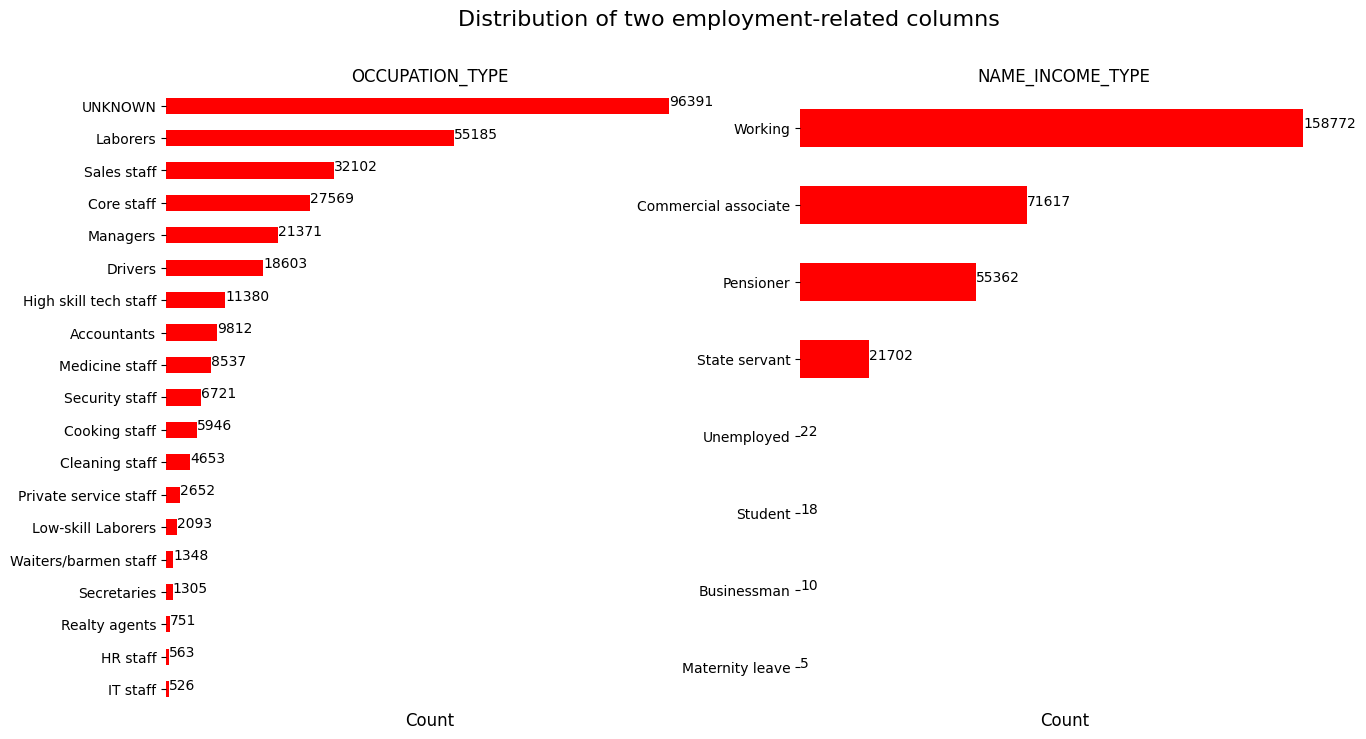

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle("Distribution of two employment-related columns",
            fontsize=16)
for i, column in enumerate(["OCCUPATION_TYPE", "NAME_INCOME_TYPE"]):
    (application[column]
     .value_counts().
     sort_values(ascending=True)
     .plot(kind="barh", ax=ax[i], color="red"))
    helper_functions.customize_bar(position="h", axes=ax[i], values_font=10)
    ax[i].set_ylabel("")
    ax[i].set_title(column)
    ax[i].set_xlabel("Count", fontsize=12);

Occupation type:
    Most frequent value is missing. We have a lot of laborers, people from sales, core staff, managers, drivers. In addition, there are a lot of high skill tech staff people.

Type of income:
    Majority of people are working. There are some weird categories, like businessman, commercial associate, which are supposed to belong to working group. Especially, commercial associate seems to be pretty intersting. Theoretically, they should be working. However, we have 70 thousands such rows. In addition, there are just a few Unemployed, Students or people on Maternity leave.

**Relationships between the income type and occupation type**. 
This is interesting to us, as we could understand the nature of missing values here.

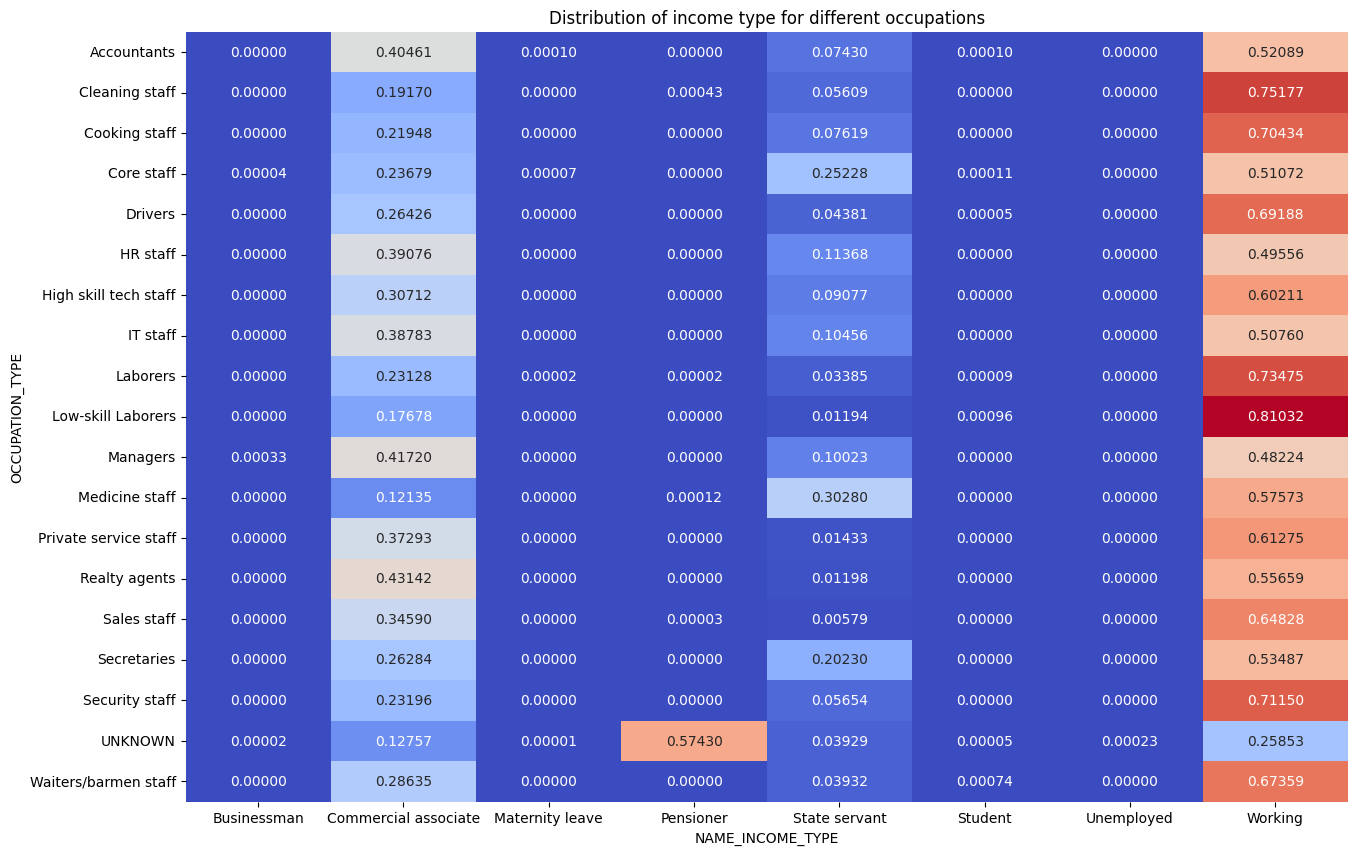

In [38]:
plt.figure(figsize=(15, 10))
ax = plt.gca()
title="Distribution of income type for different occupations"
helper_functions.plot_counts(ycolumn="OCCUPATION_TYPE", 
                             xcolumn="NAME_INCOME_TYPE",
                             data=application, fmt=".5f", ax=ax, title=title);

Very interesing insights emerge here. Majority of missing data in "OCCUPATION_TYPE" columns are Pensioners. Regarding type of income, commercial associates can be different occupation types, just like Working category. 

In [39]:
application[(application['NAME_INCOME_TYPE']
             .isin(["Pensioner"]))]["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
UNKNOWN           55357
Cleaning staff        2
Laborers              1
Medicine staff        1
Sales staff           1
Name: count, dtype: int64

We see that people, who are pensioners have usually Unknown values. There are 5 exceptional cases

**Difference in target variable between different occupations and types of income:**

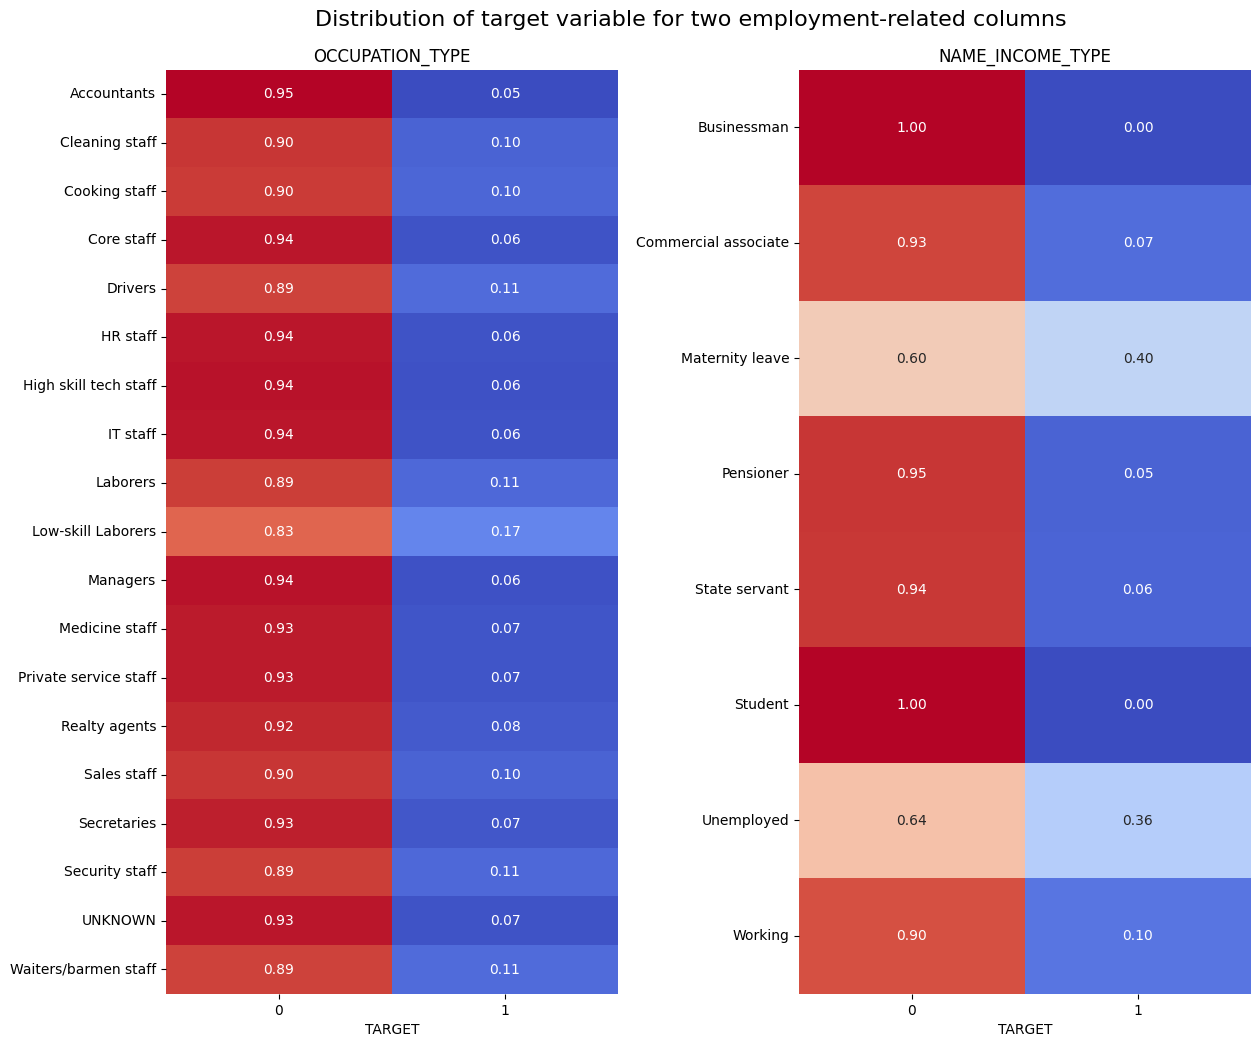

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 12))
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Distribution of target variable for two employment-related columns",
             fontsize=16, y=0.93)
for i, column in enumerate(["OCCUPATION_TYPE", "NAME_INCOME_TYPE"]):
    helper_functions.plot_counts(ycolumn=column, xcolumn="TARGET",
                                 data=application, fmt=".2f", ax=ax[i],
                                 title=column)
    ax[i].set_ylabel("")

Low-skill laborers have the highest percent of default(17%). In addition, drivers, cooking staff, cleaning staff, laborers, security staff and waiters have a higher default percent than other group.

Among working people, 10% defaulted. State servants, pensioners and commercial associates have a lower percent of default.

**Let's check type of the organization of people:**

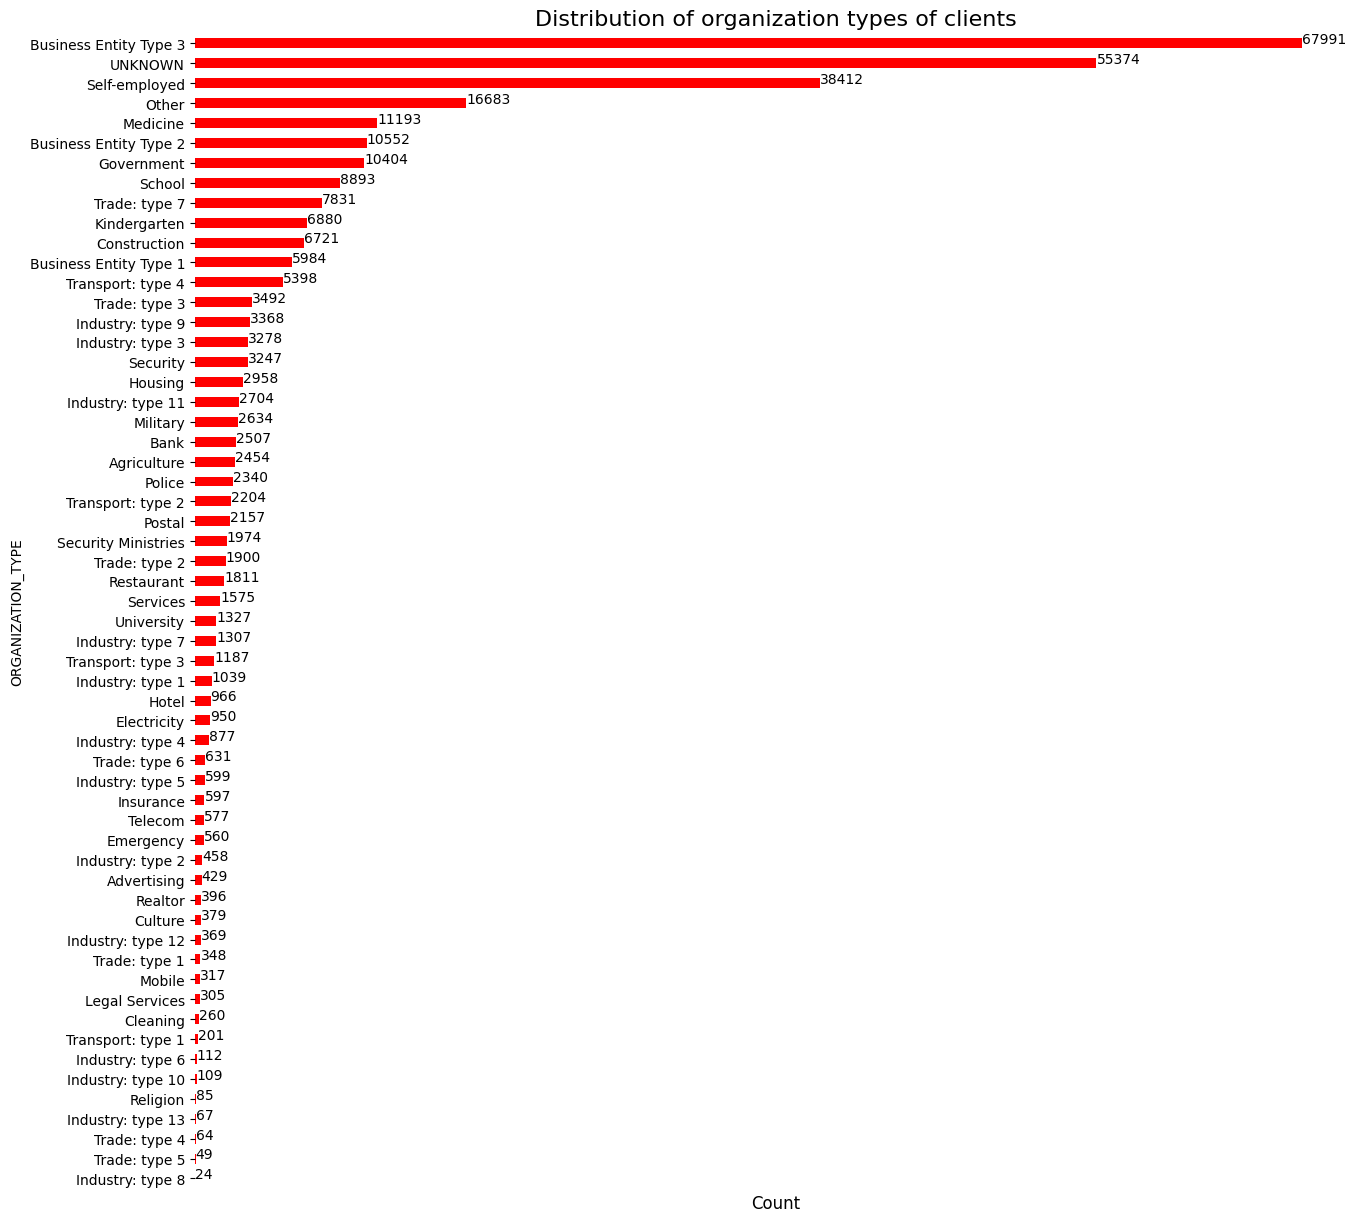

In [41]:
plt.figure(figsize=(15, 15))
plt.title("Distribution of organization types of clients", fontsize=16)
(application["ORGANIZATION_TYPE"]
 .value_counts()
 .sort_values(ascending=True).plot(kind="barh", color="red"))
ax = plt.gca()
ax.set_xlabel("Count", fontsize=12)
helper_functions.customize_bar(position="h", axes=ax, values_font=10);

We have a lot of different organizations. Interestingly, some of them are divided in different types. Business entity Type 3 is the most popular organization.

**Chance of default between different organization types**

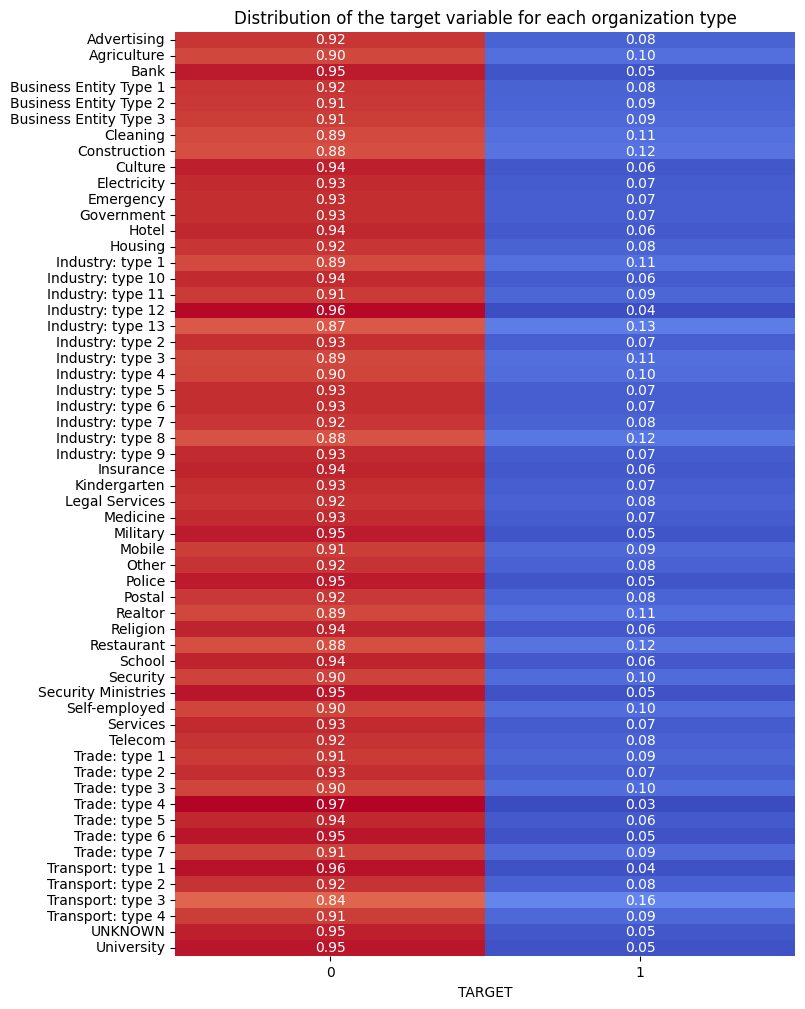

In [42]:
plt.figure(figsize=(8, 12))
ax = plt.gca()
title = "Distribution of the target variable for each organization type"
helper_functions.plot_counts(ycolumn="ORGANIZATION_TYPE", 
                             xcolumn="TARGET", data=application,
                             fmt=".2f", ax=ax, title=title)
ax.set_ylabel("");

We don't see big difference between any of the organizations

**Now, let's check relationship between type of the organization and income of the client.**

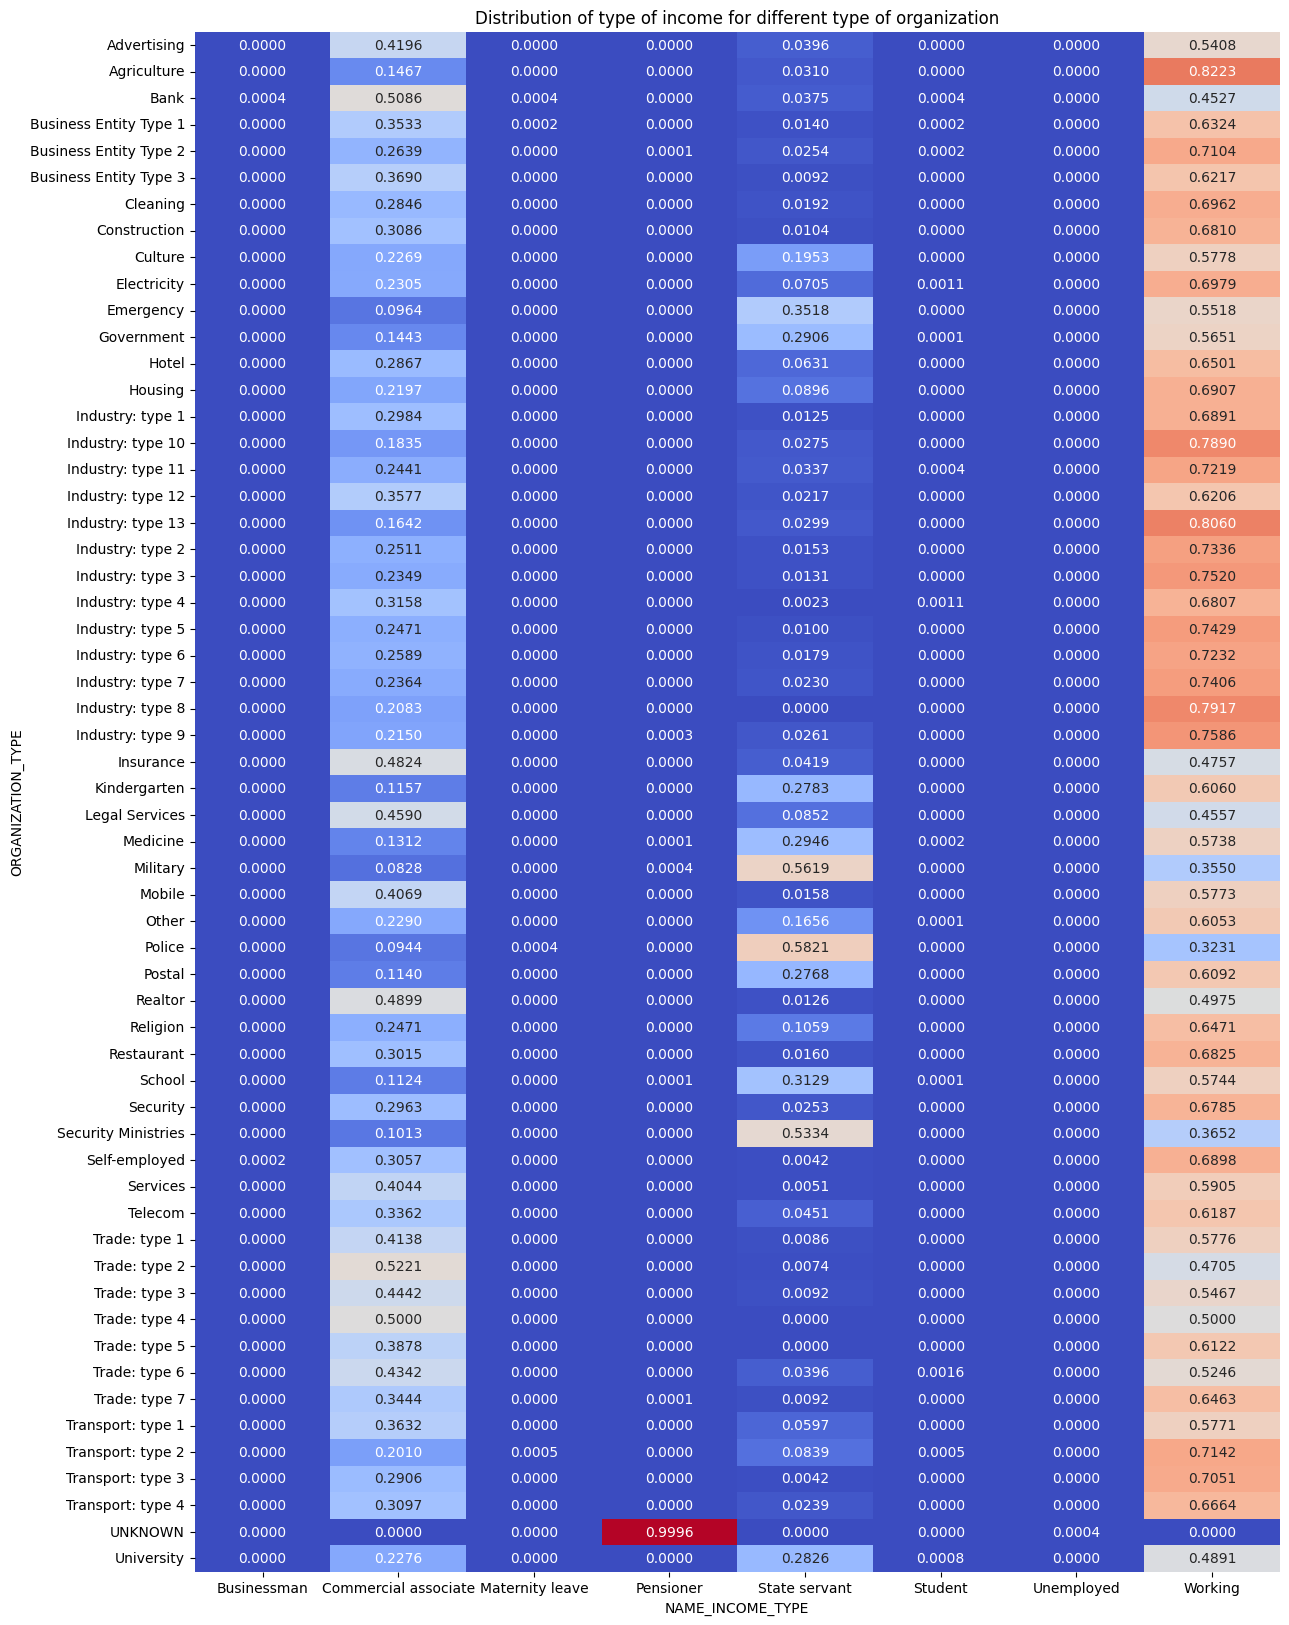

In [43]:
plt.figure(figsize=(14, 20))
ax = plt.gca()
title = "Distribution of type of income for different type of organization"
helper_functions.plot_counts(ycolumn="ORGANIZATION_TYPE", 
                             xcolumn="NAME_INCOME_TYPE", data=application,
                             fmt=".4f", ax=ax, title=title);

Here, again, missing data for Organization Type is because Income Type of the person is either Pensioner or Unemployed. Also, commercial associates belong to different organizations, just like the working category. Therefore, there is no clear understanding why they are 2 different categories. 

In [44]:
application[(application['NAME_INCOME_TYPE']
             .isin(["Pensioner"]))]["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
UNKNOWN                   55352
Business Entity Type 3        3
Business Entity Type 2        1
Industry: type 9              1
Medicine                      1
Military                      1
Trade: type 7                 1
Self-employed                 1
School                        1
Name: count, dtype: int64

There are also some exceptional cases, where a person is a pensioner, who has a job.

In [45]:
application[application["ORGANIZATION_TYPE"] == "UNKNOWN"]["NAME_INCOME_TYPE"].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

Let's drop the rows where pensioners have some organization or occupation. There are just a few rows. They likely represent some anomalies, as the pensioners usually don't have a job

In [46]:
mask = (~((application["ORGANIZATION_TYPE"] != "UNKNOWN") &
         (application["NAME_INCOME_TYPE"] == "Pensioner")) & 
        ~((application["OCCUPATION_TYPE"] != "UNKNOWN") &
          (application["NAME_INCOME_TYPE"] == "Pensioner")))
application = application[mask]

Now, we will also mark "Unknown" in organization and occupation types as Unemployed if the income type is pensioner or unemployed:

In [47]:
for data in [application, application_test]:
    data.loc[(data["ORGANIZATION_TYPE"] == "UNKNOWN") & 
                    (data["NAME_INCOME_TYPE"].isin(["Pensioner", "Unemployed"])), 
                    "ORGANIZATION_TYPE"] = "Unemployed"
    data.loc[(data["OCCUPATION_TYPE"] == "UNKNOWN") & 
                    (data["NAME_INCOME_TYPE"].isin(["Pensioner", "Unemployed"])), 
                    "OCCUPATION_TYPE"] = "Unemployed"

**Now, let's check relationships between the Organization and Occupation types**

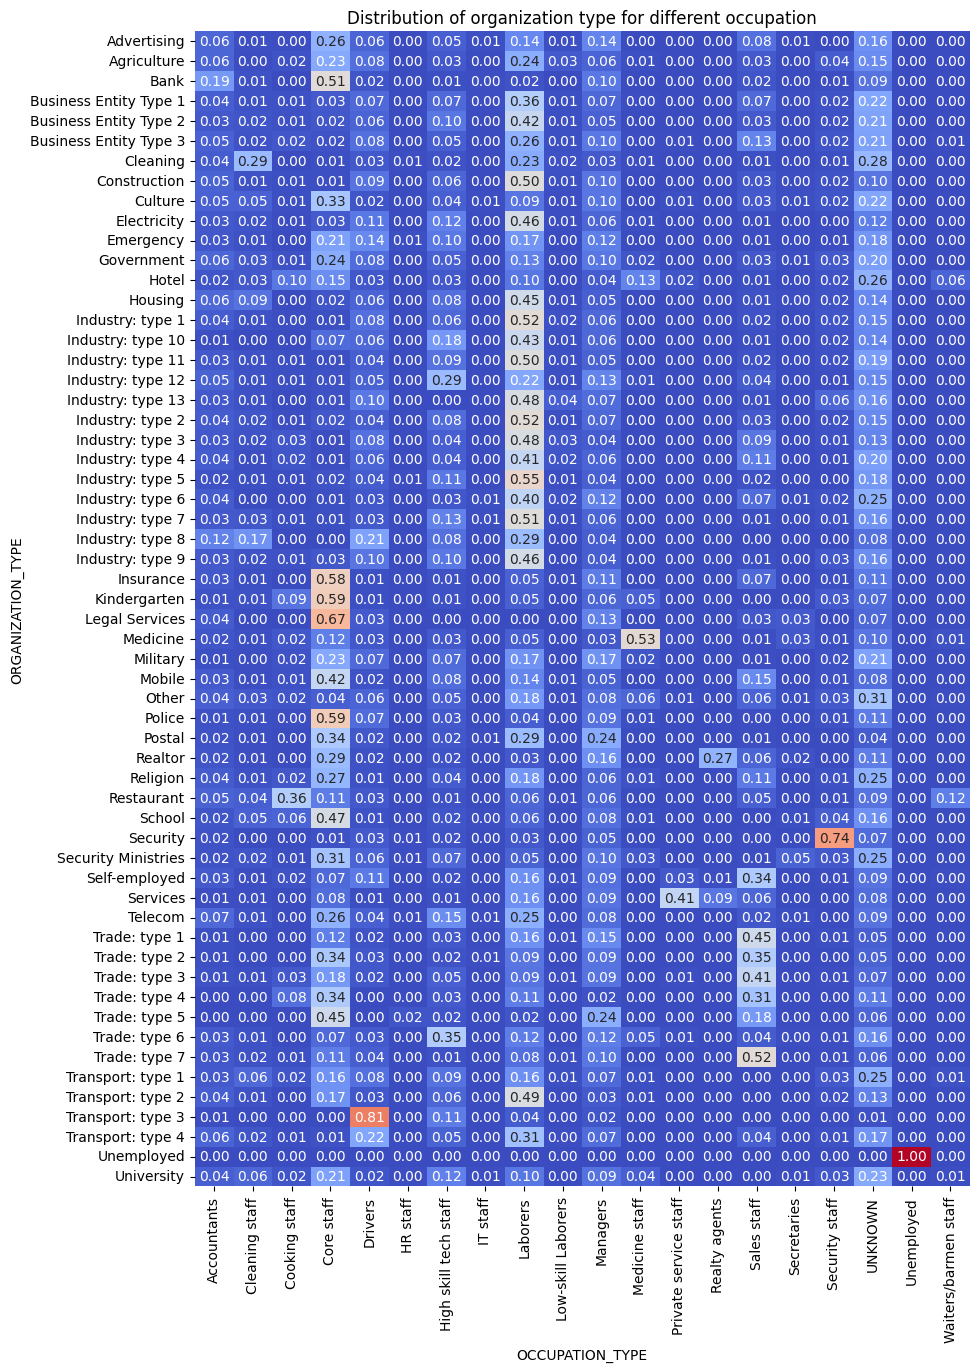

In [48]:
plt.figure(figsize=(10, 15))
ax = plt.gca()
title = "Distribution of organization type for different occupation"
helper_functions.plot_counts(ycolumn="ORGANIZATION_TYPE", 
                             xcolumn="OCCUPATION_TYPE", data=application,
                             fmt=".2f", ax=ax, title=title);

Missing data in Occupation type could be a lot of different organization types. Therefore, it's hard to find any pattern to impute this missing data manually. Regarding similar organization types(which differ by types), their distributions of occupation type is similar with each other.

**Is there an association between the Occupation type, type of income and the income of the client?**

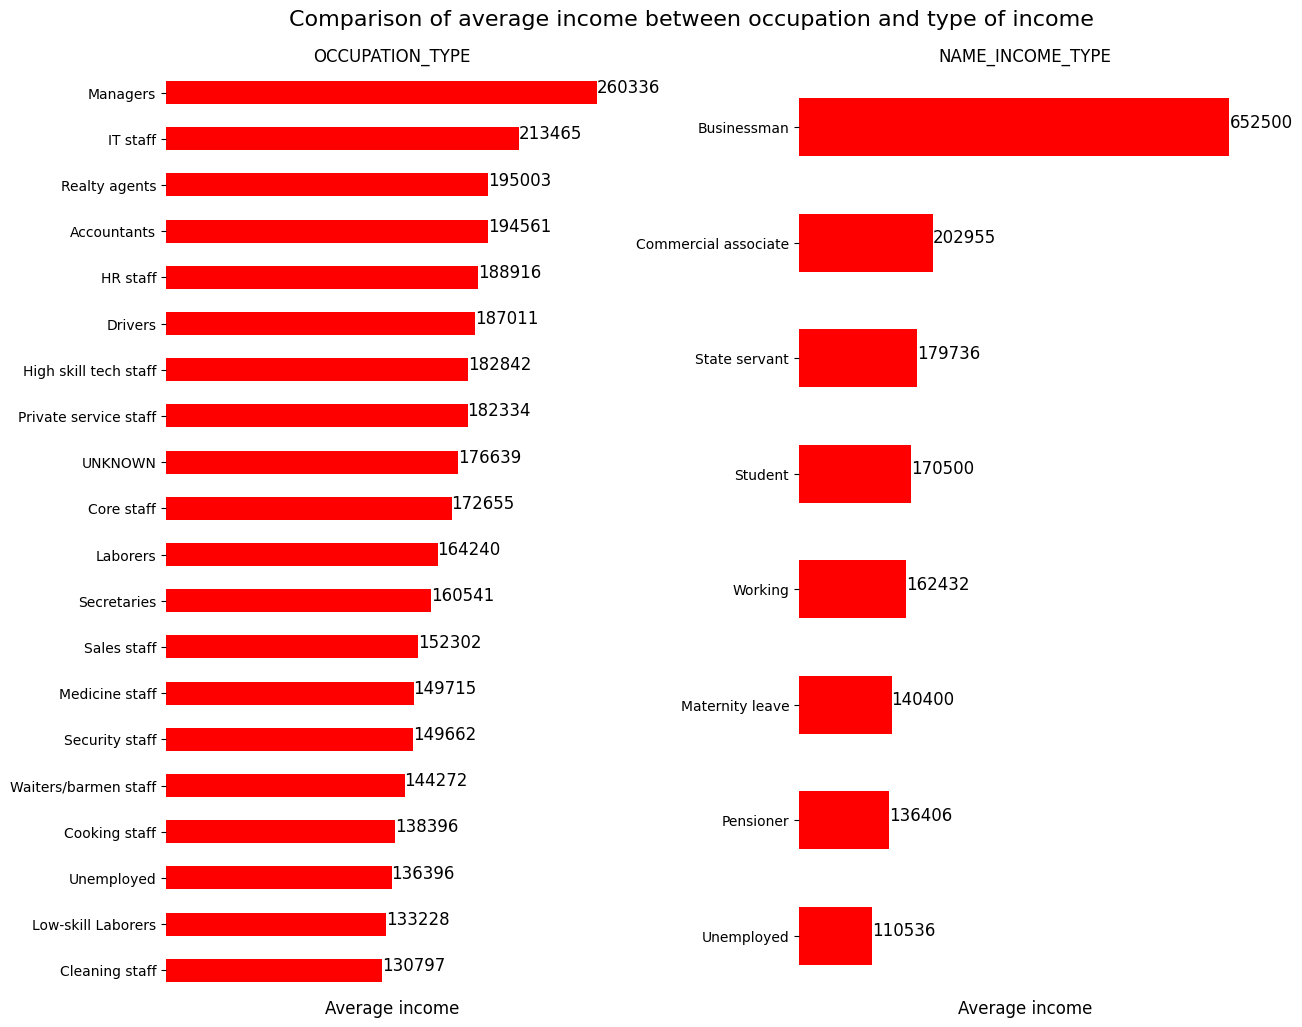

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(14, 12))
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Comparison of average income between occupation and type of income",
            fontsize=16, y=0.93)
for i, column in enumerate(["OCCUPATION_TYPE", "NAME_INCOME_TYPE"]):
    type_avg = application.groupby(column)["AMT_INCOME_TOTAL"].mean()
    type_avg.sort_values().plot(kind="barh", ax=ax[i], color="red")
    ax[i].set_title(column)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("Average income", fontsize=12)
    helper_functions.customize_bar(axes=ax[i], position="h")

Managers and IT staff are among the highest earners, while individuals with missing data fall in the mid-range—they don't represent the lowest earners, but they also don't reach the top income levels.

There are only 10 businessmen and their income is way higher than other categories. This could be the reason why they belong to a different category. In addition, income of commercial associates is higher than in the working category.

**Is there an association between the Organization type and the income of the client?**

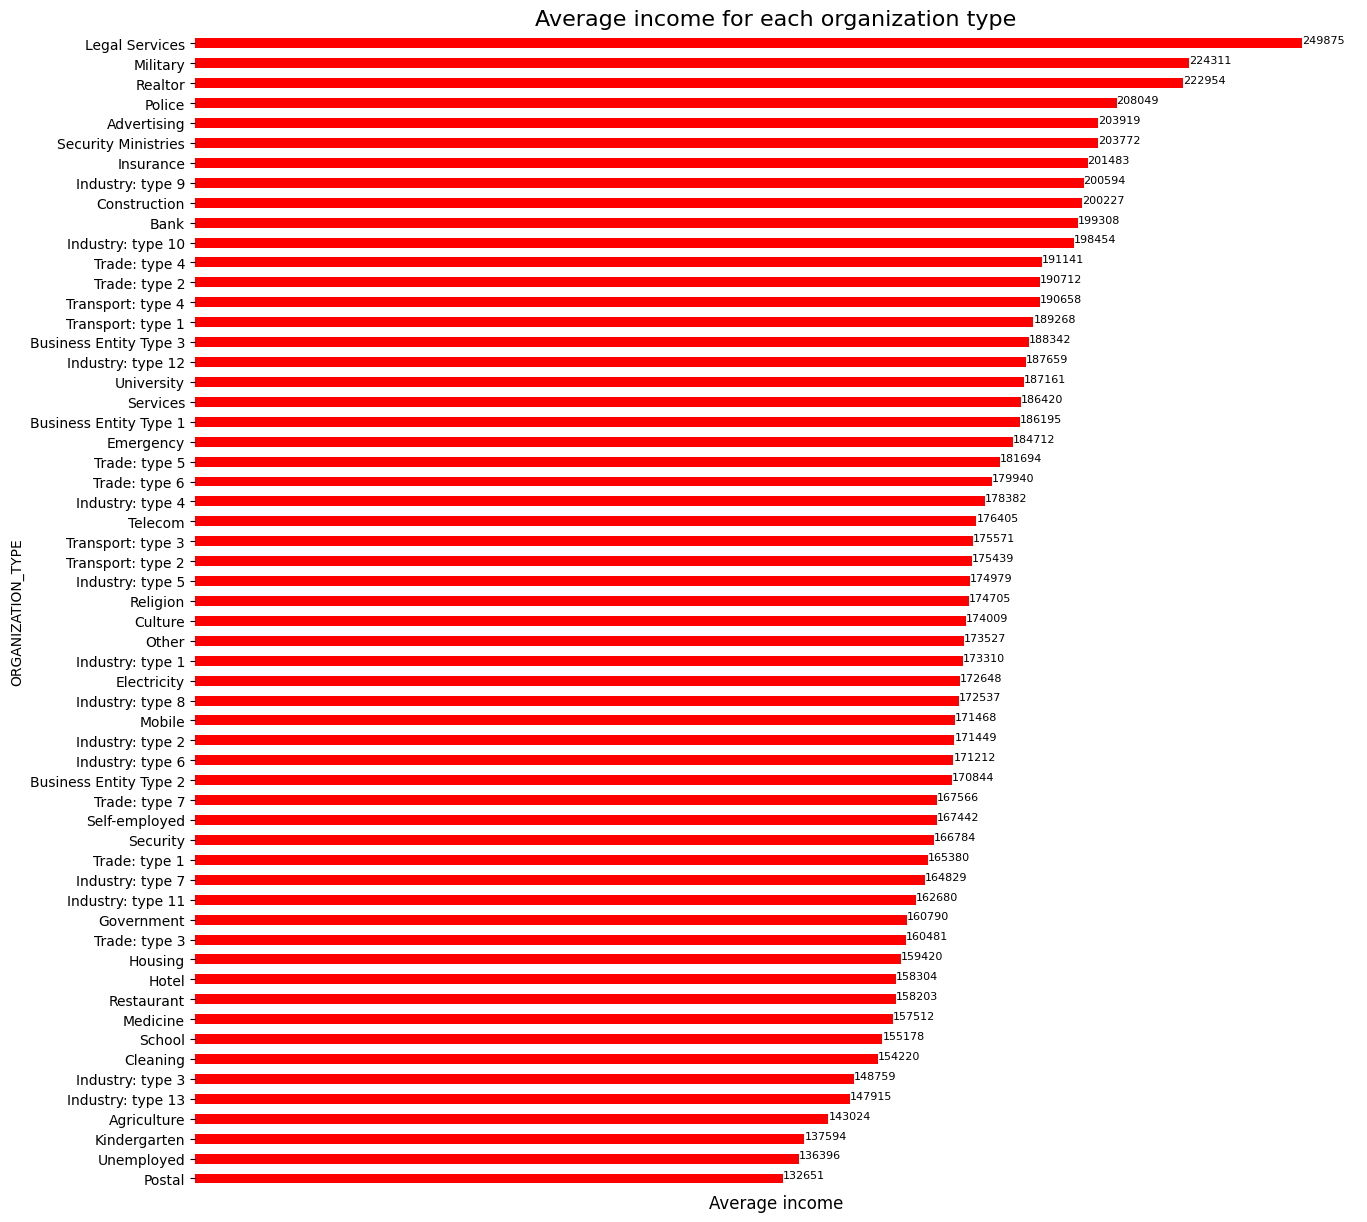

In [50]:
plt.figure(figsize=(15, 15))
plt.title("Average income for each organization type", fontsize=16)
type_avg = application.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"].mean()
type_avg.sort_values().plot(kind="barh", color="red")
ax = plt.gca()
helper_functions.customize_bar(axes=ax, position="h", values_font=8)
ax.set_xlabel("Average income", fontsize=12);

Income of the people who work in Legal Services is way higher than others. In addition, people in Military and Realtors earn more. Regarding similar organizations which differ by types, usually incomes between them don't differ much.

**What about years of employment of the customer:**

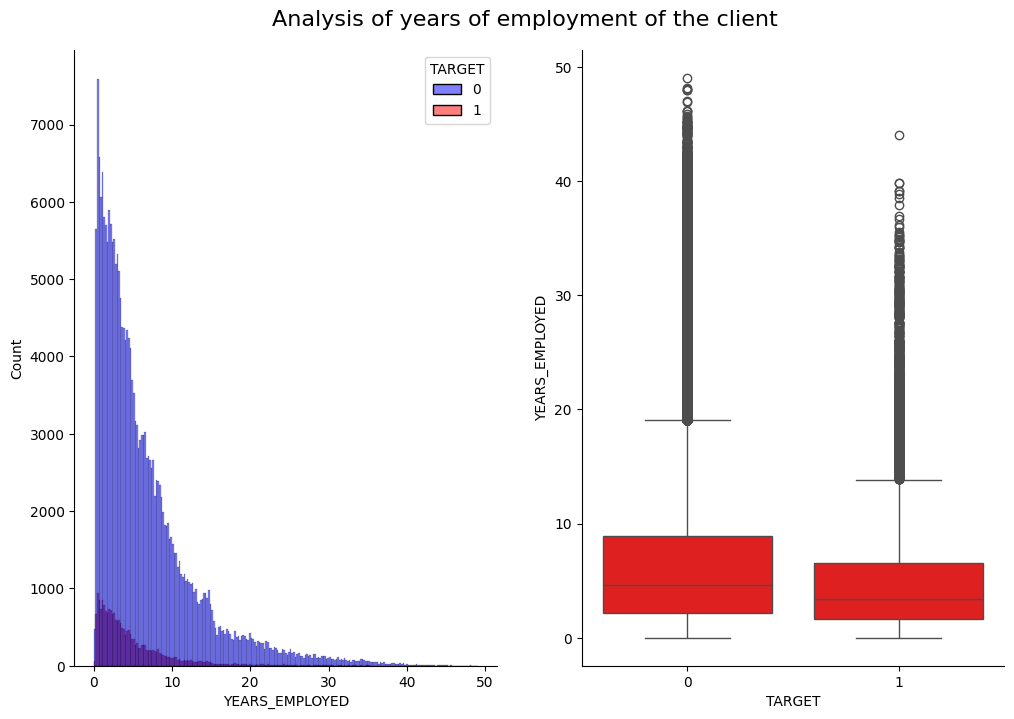

In [51]:
application.loc[:, 'YEARS_EMPLOYED'] = - application['DAYS_EMPLOYED'] / 365
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle("Analysis of years of employment of the client",
            fontsize=16, y=0.93)
sns.histplot(x="YEARS_EMPLOYED", data=application, 
             ax=ax[0], hue="TARGET", palette=["blue", "red"])
sns.boxplot(x="TARGET", data=application, 
            ax=ax[1], y="YEARS_EMPLOYED", color="red")
sns.despine();

Number of years employed is also right-skewed with a lot of outliers. We see that there is difference between number of years employed and the target variable. People, who were employed for a longer time, had lower chance of default. 

Test for statistical significance:

**Null hypothesis**: The mean of the number of years employed of people who have defaulted is not different from the mean number of years employed of people who defaulted

**Alternative hypothesis**: There is difference in the mean of the number of years employed of people who have defaulted to the mean number of years employed of people who defaulted

**Significance level**: 0.01

Assumptions:
* Random Sampling and Independence of observations have been checked
* We have large sample sizes. Therefore, we can apply Central Limit Theorem.

In [52]:
defaulted = application[application["TARGET"] == 1]
non_defaulted = application[application["TARGET"] == 0]

defaulted_ci = (sm.stats.DescrStatsW(
    defaulted['YEARS_EMPLOYED'].dropna()).zconfint_mean(alpha=0.01))

non_defaulted_ci = (sm.stats.DescrStatsW(
    non_defaulted['YEARS_EMPLOYED'].dropna()).zconfint_mean(alpha=0.01))
(defaulted_ci, non_defaulted_ci)

((4.884148526692501, 5.060836108305578), (6.644647327688194, 6.7144190073736))

99% Confidence Intervals are very far away from being overlapped. Therefore, we reject null hypothesis and conduct that the average years of employment is significantly lower for people who defaulted

**Analyse missing years of employment. Are they related to the fact that the person is unemployed?**

In [53]:
missing_days = application[application['YEARS_EMPLOYED'].isnull()]
for column in ["NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE"]:
    print("------------------------------------")
    print(column)
    print(missing_days[column].unique())

------------------------------------
NAME_INCOME_TYPE
['Pensioner' 'Unemployed']
------------------------------------
OCCUPATION_TYPE
['Unemployed']
------------------------------------
ORGANIZATION_TYPE
['Unemployed']


Now, we understand why the data for employment time was missing. This information is missing only for pensioners or unemployed people.

**Relationship between the years of employment and occupation type**

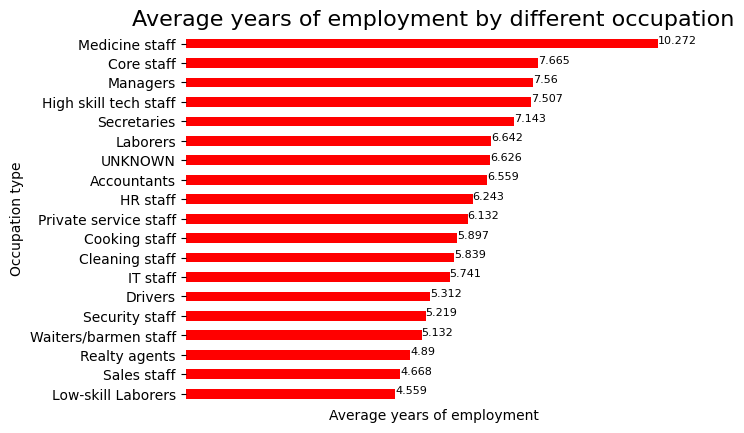

In [54]:
type_avg = application.groupby("OCCUPATION_TYPE")["YEARS_EMPLOYED"].mean()
type_avg.dropna().sort_values().plot(kind="barh", color="red")
plt.title("Average years of employment by different occupation", fontsize=16)
ax = plt.gca()
helper_functions.customize_bar(position="h", axes=ax, round_to=3, values_font=8)
ax.set_xlabel("Average years of employment");
ax.set_ylabel("Occupation type");

People, who work in medicine, work at their job the longest. Low-skill laborers, work the least number of years.

### Demographic Factors

**Age of the client:**

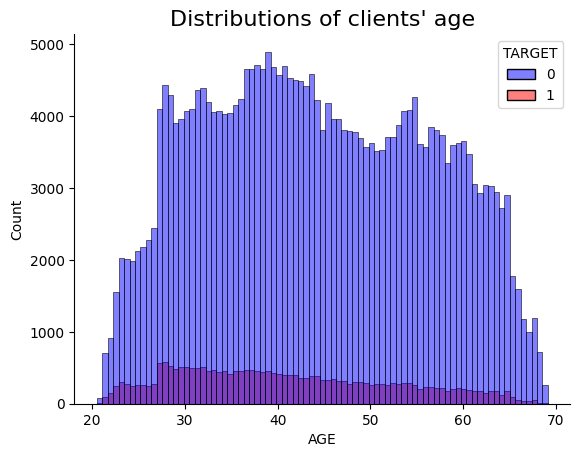

In [55]:
application.loc[:, 'AGE'] = - application['DAYS_BIRTH'] / 365
sns.histplot(x="AGE", data=application, hue="TARGET", palette=["blue", "red"])
plt.title("Distributions of clients' age", fontsize=16)
sns.despine();

We have clients from 20 to almost 70 years old. Most of them are from 28 to 60 years old. 

**Statistical significance test**

**Null hypothesis**: Average age of people who defaulted is not different from average age of people who didn't default

**Alternative hypothesis**: There is difference in the average age of people who have defaulted to the average age of people who defaulted

**Significance level**: 0.01

Assumptions:
* Random Sampling, Independence of observations have been checked
* We have large sample sizes. Therefore, we can apply Central Limit Theorem.
* Equal variances: we will conduct Levene's test of equal variances.

In [56]:
defaulted = application[application["TARGET"] == 1]
non_defaulted = application[application["TARGET"] == 0]
print(defaulted["AGE"].var())
print(non_defaulted["AGE"].var())

131.96056555766685
142.9627585061636


The variance seems to be different.

In [57]:
statistic, p_value = stats.levene(defaulted['AGE'], non_defaulted['AGE'])
p_value

7.497275740816809e-48

The p-value is tiny. We reject the null hypothesis of equal variances. Therefore, we will conduct non-parametric Welch's t-test.

In [58]:
t_stat, p_value = stats.ttest_ind(defaulted["AGE"], non_defaulted['AGE'], equal_var=False)
t_stat, p_value

(-44.99636161564295, 0.0)

In [59]:
defaulted_ci = (sm.stats.DescrStatsW(
    defaulted['AGE']).zconfint_mean(alpha=0.01))

non_defaulted_ci = (sm.stats.DescrStatsW(
    non_defaulted['AGE']).zconfint_mean(alpha=0.01))
(defaulted_ci, non_defaulted_ci)

((40.59279807919823, 40.96840473381083),
 (44.15586977349106, 44.27172540240758))

We see that the p-value is very close to 0. Moreover, the 99% CI are very far from each other. Therefore, we conduct that age is significantly lower for people, who defaulted.

Let's check age of pensioners. Are there some anomalies:

In [60]:
young_pensioners = application[(application["NAME_INCOME_TYPE"] == "Pensioner") &
                              (application["AGE"] < 40)]
print(f"Minimum age of a pensioner: {young_pensioners['AGE'].min()}")
print(f"Percent of default for young pensioners: {young_pensioners['TARGET'].mean()}")

Minimum age of a pensioner: 21.07123287671233
Percent of default for young pensioners: 0.11904761904761904


In [61]:
young_pensioners.isnull().sum().sort_values(ascending=False).head(10)

YEARS_EMPLOYED                630
DAYS_EMPLOYED                 630
EXT_SOURCE_1                  340
EXT_SOURCE_3                  220
AMT_REQ_CREDIT_BUREAU_YEAR    183
AMT_REQ_CREDIT_BUREAU_QRT     183
AMT_REQ_CREDIT_BUREAU_MON     183
AMT_REQ_CREDIT_BUREAU_WEEK    183
AMT_REQ_CREDIT_BUREAU_DAY     183
AMT_REQ_CREDIT_BUREAU_HOUR    183
dtype: int64

Interestingly, there are very young pensioners. Theoretically, this is possible because young individuals may receive pensions due to severe disabilities that prevent them from working. If someone becomes disabled at a young age, they might be entitled to lifelong disability pension benefits. Some pension systems provide benefits to dependents (spouses, children) of deceased pensioners. 
The rows have a lot of missing data in bureau enquiries column and the score from external sources. In addition, the percent of default is almost 12% among young pensioners

**Categorical demographic columns:**

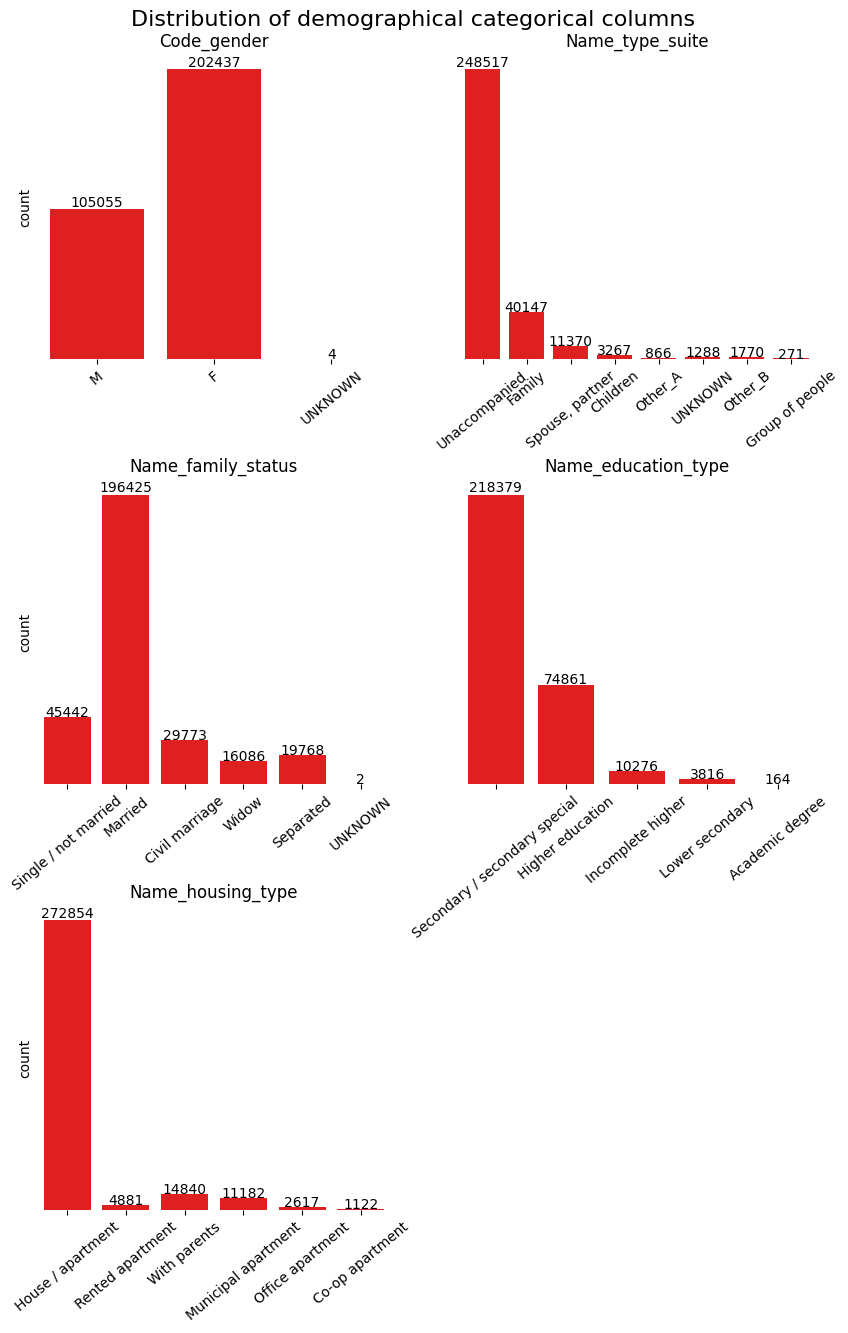

In [62]:
cat_columns = ["CODE_GENDER", "NAME_TYPE_SUITE",
               "NAME_FAMILY_STATUS", "NAME_EDUCATION_TYPE",
              "NAME_HOUSING_TYPE"]
title = "Distribution of demographical categorical columns"
helper_functions.plot_cat_columns(application, cat_columns, col_number=2,
                                  title=title, figsize=(10, 15), rotate=40);

There are two times more females than males. 4 values are Unknown. Most of the people were Unaccompannied. There are some weird categories in the accompanying column: Other_A, Other_B. Also, most of the clients are married, only 2 values are missing. Majority of people have secondary or higher education. Likewise, majority of people have a house or apartment. 

**Let's explore the percent of default for different categories of different columns.**

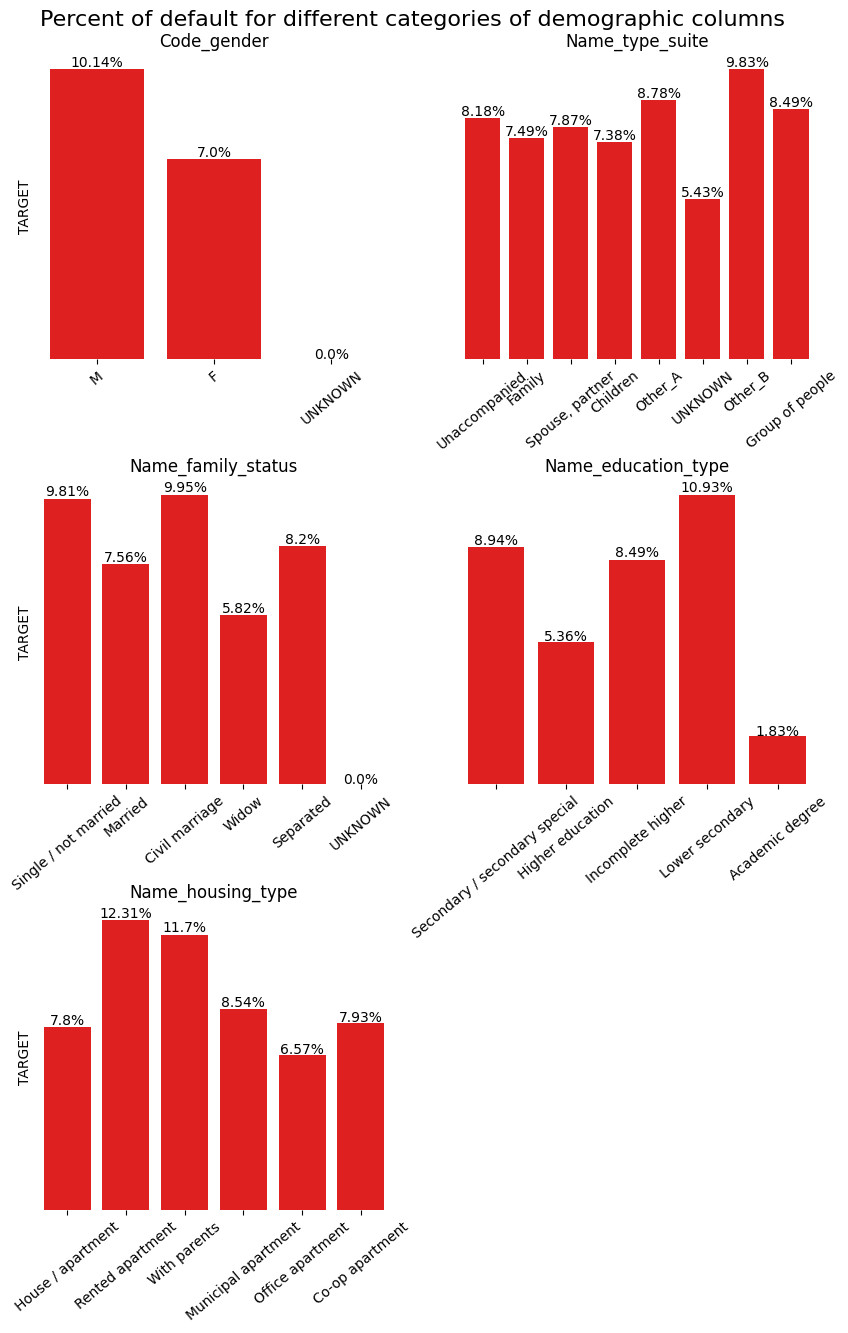

In [63]:
title = "Percent of default for different categories of demographic columns"
helper_functions.plot_cat_columns(application, cat_columns, col_number=2,
                                   title=title, figsize=(10, 15), rotate=40, 
                                   target="TARGET");

Man seem to have higher chance of default(10% compared to 7% in women). 
Those, who were accompanied by the misterious groups A and B have higher chance of default too. For missing data of Name_type_suite column, the chance of default is the lowest. There were found no pattern of missing data in this column with some other columns.

Family status also has some association. People, who are either single, separated or in civil marriage have higher chance of default.

Regarding education, higher level means lower chance of default. The highest percent of default is among the people with lower secondary education.

People, who live in Rented apartment or with their parents have a higher percent of defaults.

**Let's analyse number of children and family members:**

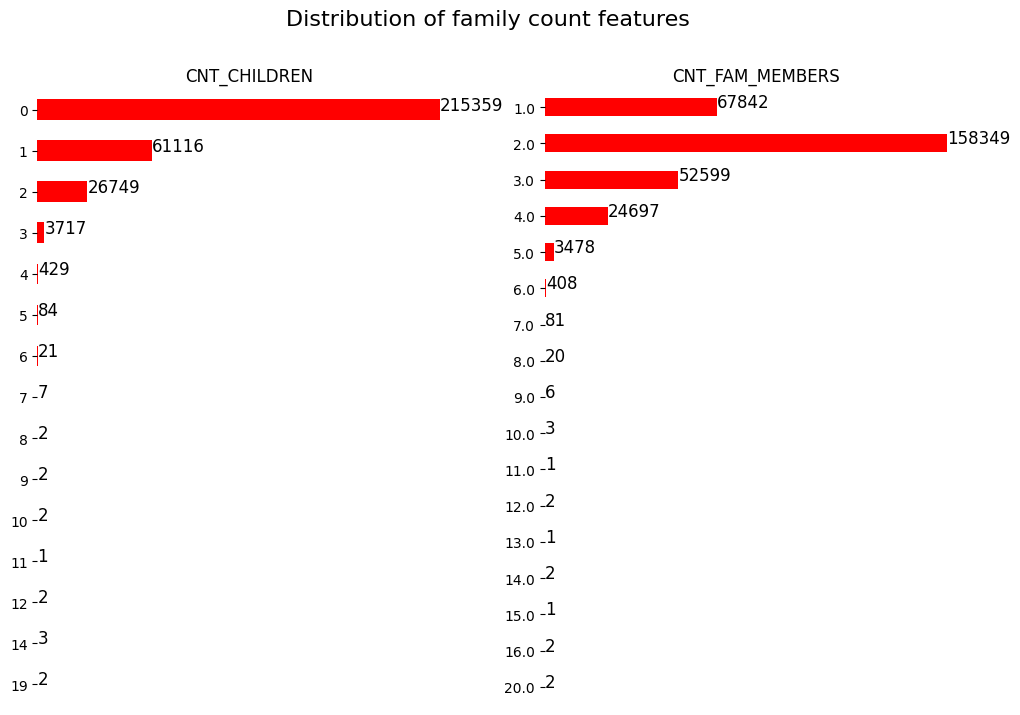

In [64]:
family_cols = ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle("Distribution of family count features", fontsize=16)
for i, column in enumerate(family_cols):
    count_val = application[column].value_counts().sort_index(ascending=False)
    count_val.plot(kind="barh", ax=ax[i], color="red")
    helper_functions.customize_bar(position="h", axes=ax[i])
    ax[i].set_ylabel("")
    ax[i].set_title(column)

Majority of people have 0 children. There are very few people, who have more than 3 children. 

Majority of people have 2 family members. Also, there are very few people with more than 5 family members.

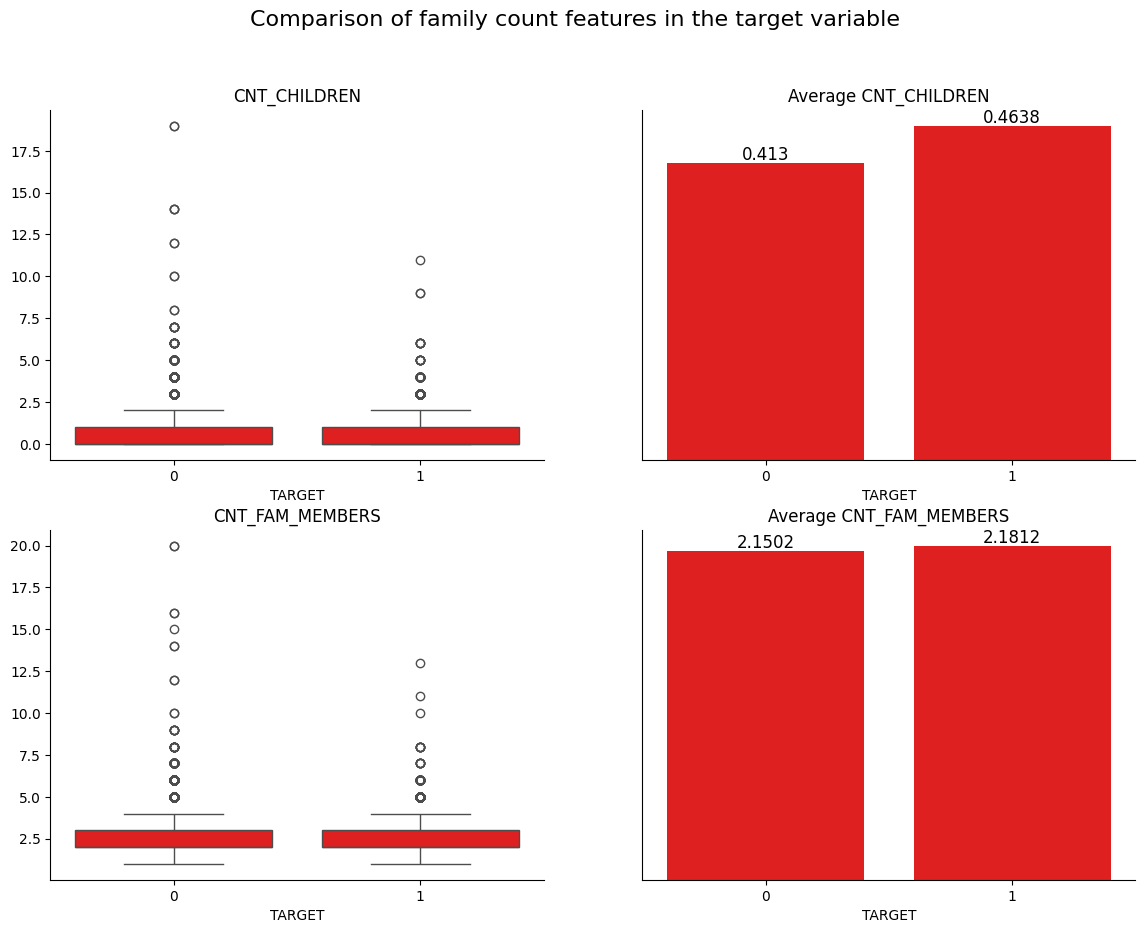

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("Comparison of family count features in the target variable", 
             fontsize=16)
for i, column in enumerate(family_cols):
    sns.boxplot(y=column, data=application, x="TARGET", 
                ax=ax[i, 0], color="red")
    sns.barplot(y=column, data=application, x="TARGET", 
                ax=ax[i, 1], color="red", errorbar=None)
    helper_functions.customize_bar(axes=ax[i, 1], position="v", round_to=4)
    ax[i, 1].set_title(f"Average {column}")
    ax[i, 0].set_title(f"{column}")
    ax[i, 1].set_ylabel("")
    ax[i, 0].set_ylabel("")
sns.despine()

There is some difference in average number of chidren between values of the target variable. People, with more children on average, defaulted more often. However, regarding outliers with a lot of family members or children, some people defaulted while other didn't.

**Ratings of the region where the client lives:**

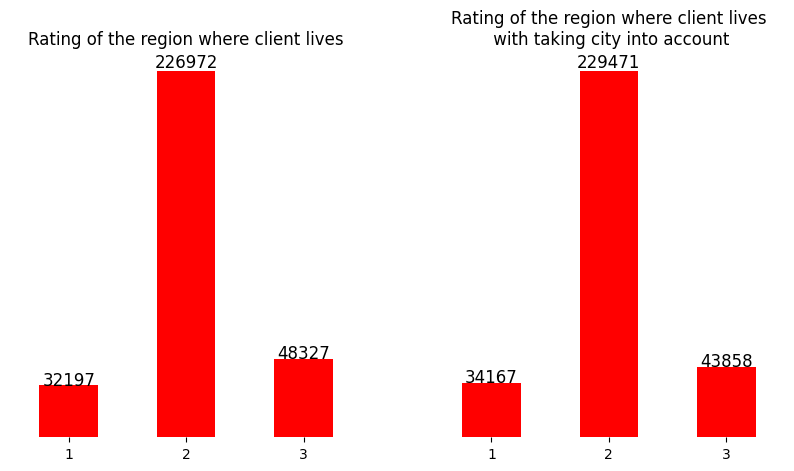

In [66]:
region_cols = ["REGION_RATING_CLIENT", 
               "REGION_RATING_CLIENT_W_CITY"]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, column in enumerate(region_cols):
    count_val = application[column].value_counts().sort_index()
    count_val.plot(kind="bar", ax=ax[i], color="red")
    helper_functions.customize_bar(position="v", axes=ax[i])
    ax[i].set_xlabel("")
ax[0].set_title("Rating of the region where client lives")
ax[1].set_title("Rating of the region where client lives\n"
                " with taking city into account");

In [67]:
application[region_cols].corr()

REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT                     1.000000                     0.950847
REGION_RATING_CLIENT_W_CITY              0.950847                     1.000000

Both columns have almost the same distributions and almost perfect correlation. There is no point in keeping both columns

**Population of the city:**

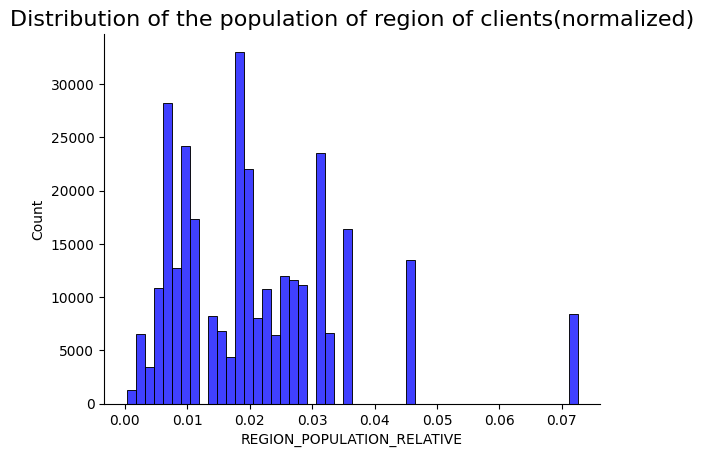

In [68]:
sns.histplot(x="REGION_POPULATION_RELATIVE", data=application, 
             bins=50, color="blue")
sns.despine()
plt.title("Distribution of the population of region of clients(normalized)",
         fontsize=16);

In [69]:
len(application["REGION_POPULATION_RELATIVE"].unique())

81

There are only 81 unique values in this column. The reasons for this could be the fact that a lot of clients live in the same regions. Also, the values are normalized

Check outliers:

In [70]:
pop_outliers = application[application["REGION_POPULATION_RELATIVE"] > 0.04]
no_outliers = application[application["REGION_POPULATION_RELATIVE"] <= 0.04]
print("Average Income of people in most populated areas:",
      pop_outliers["AMT_INCOME_TOTAL"].mean())
print("Average Income of people in less populated areas:",
      no_outliers["AMT_INCOME_TOTAL"].mean())

print("Average default of people in most populated areas:",
      pop_outliers["TARGET"].mean())
print("Average default of people in less populated areas:",
      no_outliers["TARGET"].mean())

Average Income of people in most populated areas: 253622.35954516334
Average Income of people in less populated areas: 161900.74521756257
Average default of people in most populated areas: 0.04562093895854306
Average default of people in less populated areas: 0.0834156041478494


All the outliers regions(most populated) have the lowest rating. In addition, there is expected difference between the average income. People, who live in more populated regions, earn more.

**Statistical significance test**

**Null hypothesis**: There is no significant difference in proportion of defaults between clients with who live in most populated areas(>0,4) and those, who live in less populated areas.

**Alternative hypothesis**: There is a significant difference in proportion of defaults between clients with who live in most populated areas(>0,4) and those, who live in less populated areas.
**Significance level**: 1%

In [71]:
print(pop_outliers["TARGET"].value_counts())
print(no_outliers["TARGET"].value_counts())

TARGET
0    20857
1      997
Name: count, dtype: int64
TARGET
0    261815
1     23827
Name: count, dtype: int64


In [72]:
defaulted = np.array([997, 23827]) 
non_defaulted = np.array([20857, 261815])    


z_stat, p_value = sm.stats.proportions_ztest(defaulted, non_defaulted)
z_stat, p_value

(-21.216998929940857, 6.653774116732937e-100)

We reject the Null hypothesis and conduct statistically significant difference in target variable between clients' who live in more populated areas and less populated.

### Social surroundigs of the client

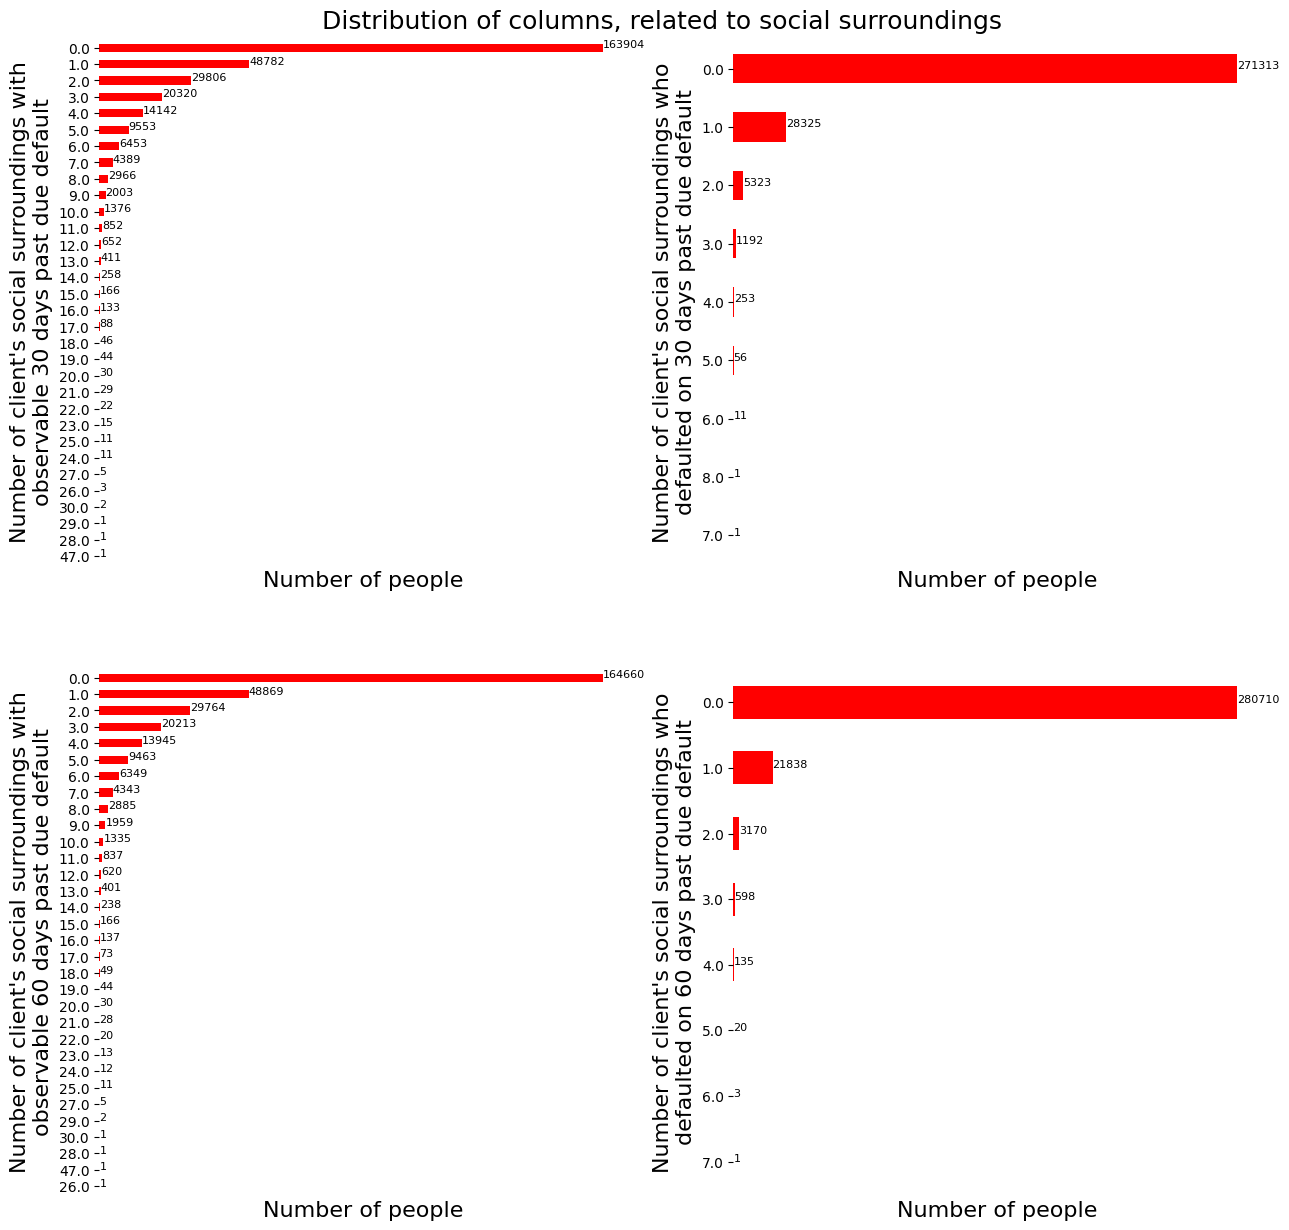

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle("Distribution of columns, related to social surroundings",
            fontsize=18, y=0.9)

for i, column in enumerate(surround_cols):
    value_count = application[column].value_counts().sort_values(ascending=True)
    
    # Determine the position in the 2x2 grid
    row, col = divmod(i, 2)
    
    value_count.plot(kind="barh", ax=ax[row, col], color="red")
    
    helper_functions.customize_bar(axes=ax[row, col], position="h", values_font=8)
    ax[row, col].set_xlabel("Number of people", fontsize=16)

ax[0, 0].set_ylabel("Number of client's social surroundings with\n"
                    "observable 30 days past due default", fontsize=16)
ax[0, 1].set_ylabel("Number of client's social surroundings who\n"
                    "defaulted on 30 days past due default", fontsize=16)
ax[1, 0].set_ylabel("Number of client's social surroundings with\n"
                    "observable 60 days past due default", fontsize=16)
ax[1, 1].set_ylabel("Number of client's social surroundings who\n"
                    "defaulted on 60 days past due default", fontsize=16);

Usually, client's surroundings didn't have any problems with paying the loan back. However, there are a lot of outliers. Several clients could have up to 8 clients who defaulted on their loans. In addition, some clients had up to 30 people who had problems with paying in time.

**Check for correlations**

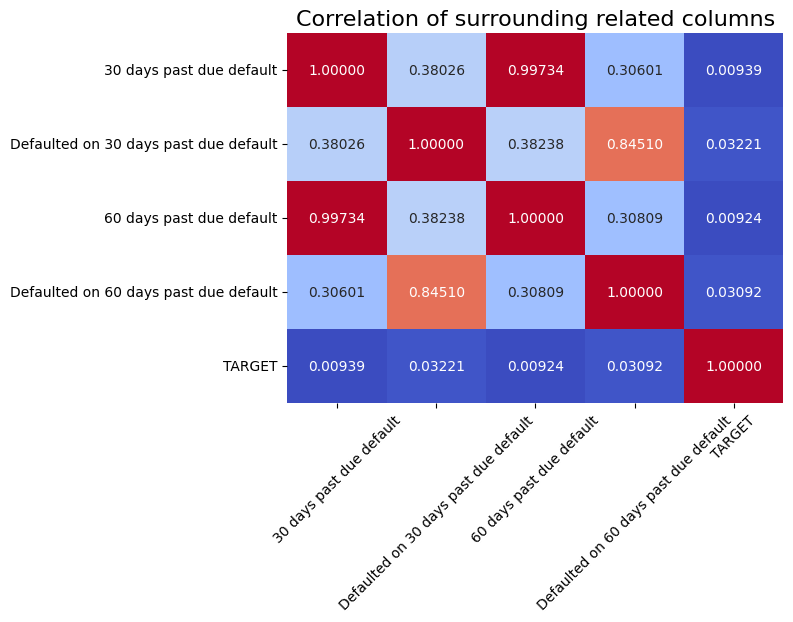

In [74]:
corr_check = application[surround_cols + ["TARGET"]].corr(method="spearman")

heatmap = sns.heatmap(corr_check, cmap="coolwarm", 
                      annot=True, fmt=".5f", cbar=None)
ticklabels = ["30 days past due default", 
              "Defaulted on 30 days past due default",
             "60 days past due default",
             "Defaulted on 60 days past due default",
             "TARGET"]
heatmap.set_title("Correlation of surrounding related columns", fontsize=16)
heatmap.set_xticklabels(ticklabels, rotation=45)
heatmap.set_yticklabels(ticklabels);

Columns, related to the clients' friends defaulted are strongly positively correlated. All the other columns have positive correlation of around 0.3. Regarding correlation with the target variable, columns where clients' surroundings defaulted have some higher correlation with the target variable(around 0.03)

**Enquiries to bureau**

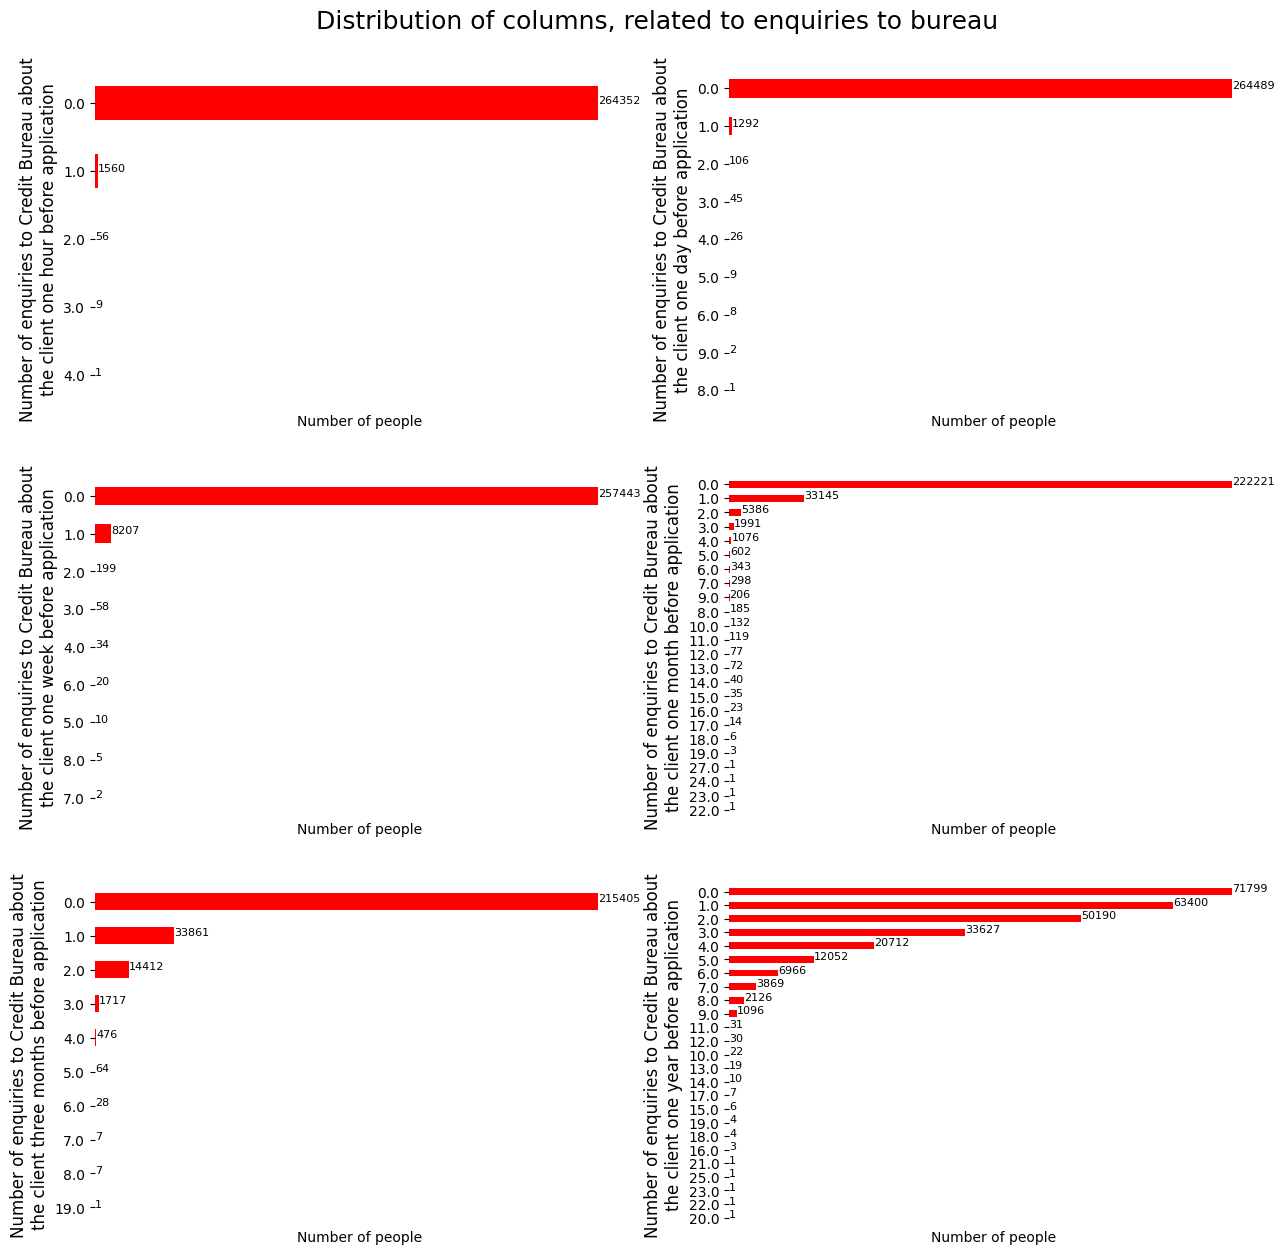

In [75]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle("Distribution of columns, related to enquiries to bureau",
            fontsize=18, y=0.92)

for i, column in enumerate(bureau_enq_cols):
    value_count = application[column].value_counts().sort_values(ascending=True)
    
    # Determine the position in the 3x2 grid
    row, col = divmod(i, 2)
    
    value_count.plot(kind="barh", ax=ax[row, col], color="red")
    
    helper_functions.customize_bar(axes=ax[row, col], position="h", values_font=8)
    ax[row, col].set_xlabel("Number of people", fontsize=10)

ax[0, 0].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client one hour before application", fontsize=12)
ax[0, 1].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client one day before application", fontsize=12)
ax[1, 0].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client one week before application", fontsize=12)
ax[1, 1].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client one month before application", fontsize=12)
ax[2, 0].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client three months before application", fontsize=12)
ax[2, 1].set_ylabel("Number of enquiries to Credit Bureau about\n"
                    "the client one year before application", fontsize=12);

Usually, there were no enquiries about the client. The distributions are highly skewed

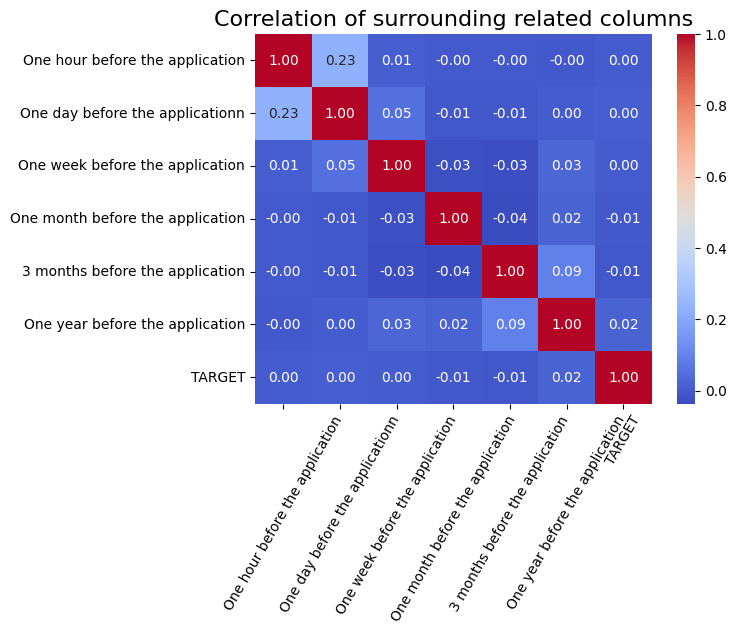

In [76]:
corr_check = application[bureau_enq_cols + ["TARGET"]].corr(method="spearman")
heatmap = sns.heatmap(corr_check, cmap="coolwarm", annot=True, fmt=".2f")
ticklabels = ["One hour before the application", 
              "One day before the applicationn",
              "One week before the application",
              "One month before the application",
             "3 months before the application",
             "One year before the application",
             "TARGET"]
heatmap.set_title("Correlation of surrounding related columns", fontsize=16)
heatmap.set_xticklabels(ticklabels, rotation=60)
heatmap.set_yticklabels(ticklabels);

There doesn't seem to be a correlation between the bureau enquiries columns. In addition, correlation of features with the target variable is around 0.

**Do people, who have missing data in bureau enquiries column, have no data in bureau column?**

Check bureau table:

In [77]:
missing_bureau_enq = application[application["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull()]
bureau[bureau["SK_ID_CURR"].isin(missing_bureau_enq["SK_ID_CURR"].unique())]

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY]
Index: []

People, for whom data is missing about enquiries to bureau, have no data in bureau. That could be the reason, why we don't have values of bureau enquiries in these columns.

**Score of the external sources:**

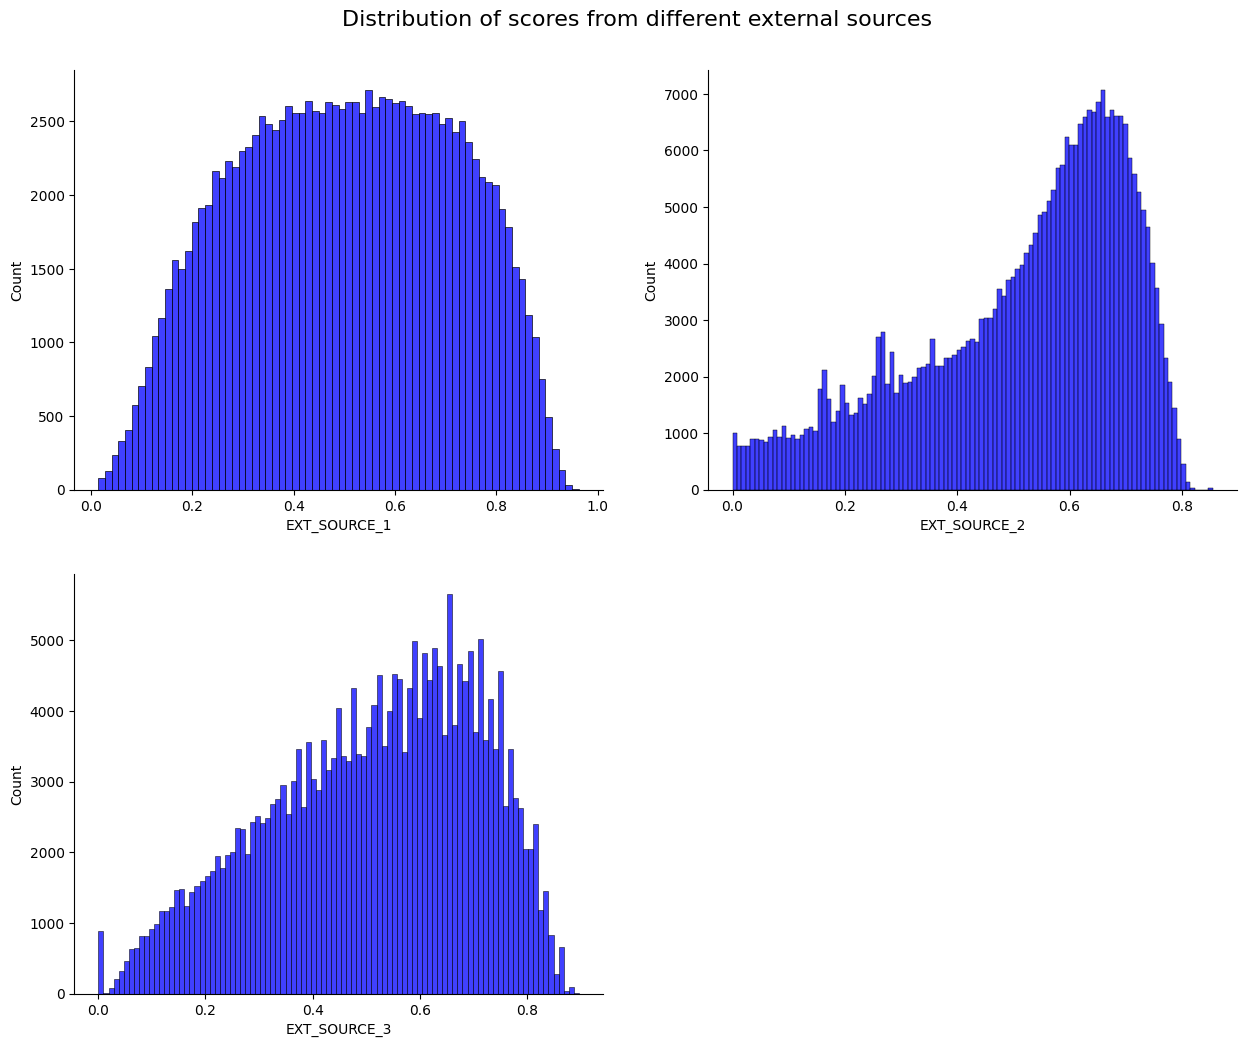

In [78]:
title = "Distribution of scores from different external sources"
helper_functions.plot_num_dist(columns=ext_source_cols, 
                               data=application, 
                               figsize=(15, 12), 
                               title=title);

Different distributions could because of the fact that EXT_SOURCE_1 and EXT_SOURCE_3 have a lot of missing data. 

**Let's compare scores betweeen values of the target variable**

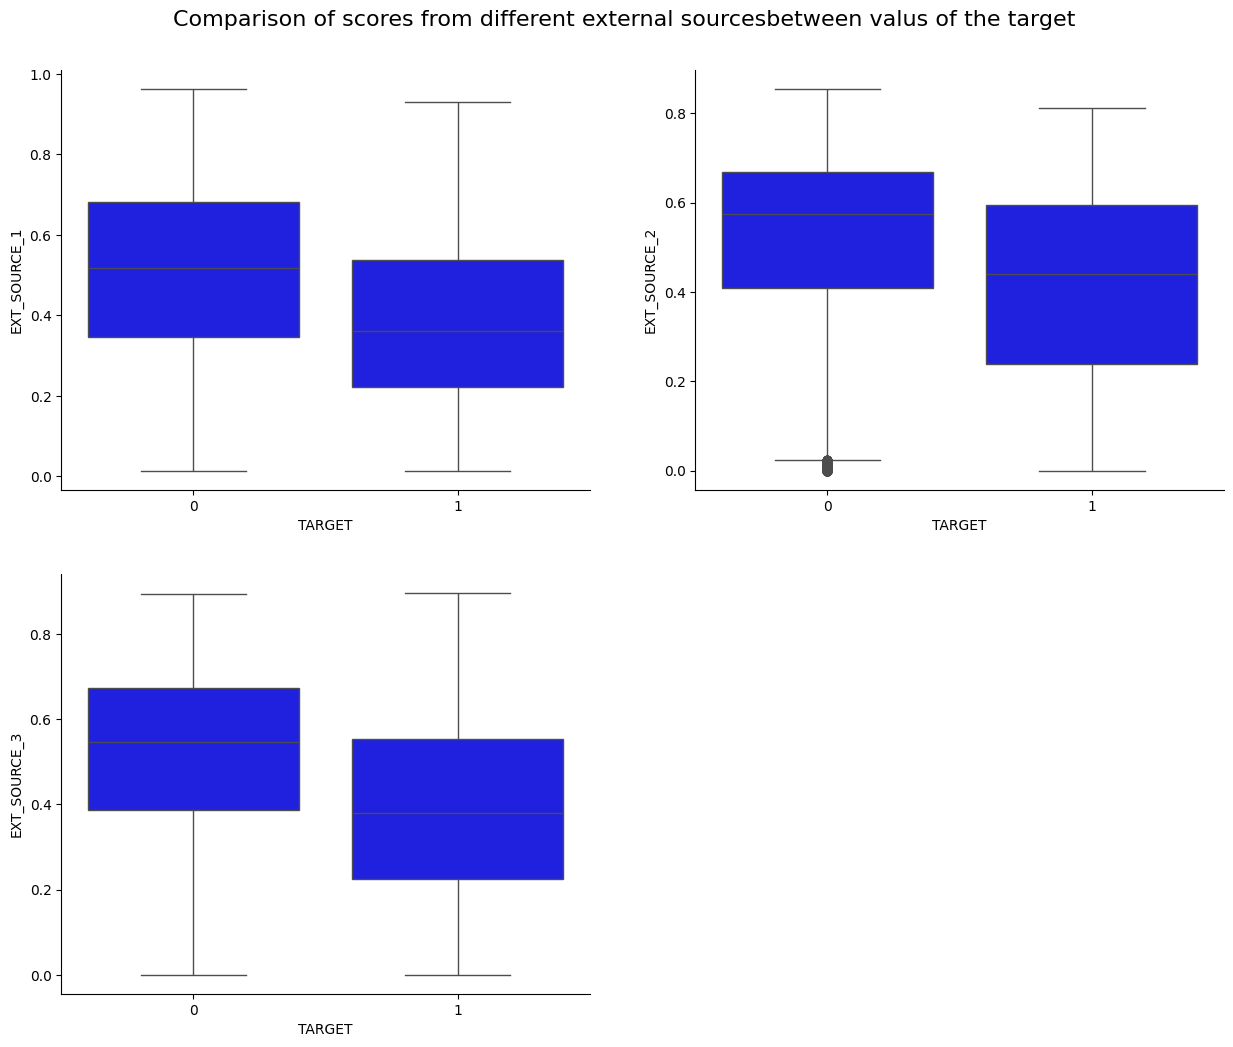

In [79]:
title = ("Comparison of scores from different external sources"
         "between valus of the target")
helper_functions.plot_num_dist(columns=ext_source_cols, 
                               data=application, 
                               figsize=(15, 12), 
                               title=title,
                              plot_type="box",
                              hue="TARGET");

As expected, there is difference in scores between the target variable. People, who defaulted, have lower scores from external sources.

Let's check for correlations the following features:
* TARGET
* EXTERNAL SOURCES
* AGE
* YEARS_EMPLOYED

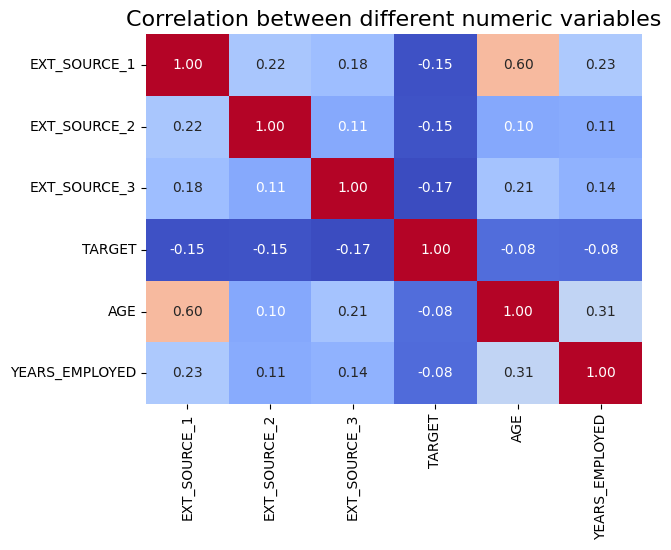

In [80]:
corr_check = application[
    ext_source_cols + ["TARGET", "AGE", "YEARS_EMPLOYED"]].corr(method="spearman")
heatmap = sns.heatmap(corr_check, cmap="coolwarm",
                      annot=True, fmt=".2f", cbar=None)
heatmap.set_title("Correlation between different numeric variables", fontsize=16);

External sources column can be very good predictors of the target variable. Interestingly, age is strongly correlated with EXT_SOURCE_1 column. Moreover, it is moderately correlated with EXT_SOURCE_3 column. These two external sources columns have more missing data. 

Let's check rows, where scores are missing:

In [81]:
source_1_null = (application[
    application['EXT_SOURCE_1'].isnull()].isnull().sum().sort_values(ascending=False))
source_1_null.head(20)

EXT_SOURCE_1                  173366
YEARS_EMPLOYED                 42515
DAYS_EMPLOYED                  42515
EXT_SOURCE_3                   36572
AMT_REQ_CREDIT_BUREAU_WEEK     25052
AMT_REQ_CREDIT_BUREAU_DAY      25052
AMT_REQ_CREDIT_BUREAU_HOUR     25052
AMT_REQ_CREDIT_BUREAU_MON      25052
AMT_REQ_CREDIT_BUREAU_QRT      25052
AMT_REQ_CREDIT_BUREAU_YEAR     25052
DAYS_LAST_PHONE_CHANGE         24485
OBS_30_CNT_SOCIAL_CIRCLE         551
DEF_30_CNT_SOCIAL_CIRCLE         551
OBS_60_CNT_SOCIAL_CIRCLE         551
DEF_60_CNT_SOCIAL_CIRCLE         551
EXT_SOURCE_2                     449
AMT_GOODS_PRICE                  141
DAYS_ID_PUBLISH                    8
AMT_ANNUITY                        4
CNT_FAM_MEMBERS                    1
dtype: int64

Clients, who have missing data in EXT_SOURCE_1 column, have a lot of missing entries in DAYS_EMPLOYED COLUMN. As we saw before, missing data for DAYS_EMPLOYED column is only for Pensioners or Unemployed people. In addition, missing data in  EXT_SOURCE_1 column could be missing for EXT_SOURCE_3 and EXT_SOURCE_2.

In [82]:
source_2_null = (application[
    application['EXT_SOURCE_2'].isnull()].isnull().sum().sort_values(ascending=False))
source_2_null.head(20)

EXT_SOURCE_2                  660
EXT_SOURCE_1                  449
EXT_SOURCE_3                  230
YEARS_EMPLOYED                156
DAYS_EMPLOYED                 156
DAYS_LAST_PHONE_CHANGE        133
AMT_REQ_CREDIT_BUREAU_YEAR    132
AMT_REQ_CREDIT_BUREAU_QRT     132
AMT_REQ_CREDIT_BUREAU_MON     132
AMT_REQ_CREDIT_BUREAU_WEEK    132
AMT_REQ_CREDIT_BUREAU_DAY     132
AMT_REQ_CREDIT_BUREAU_HOUR    132
OBS_60_CNT_SOCIAL_CIRCLE        4
DEF_60_CNT_SOCIAL_CIRCLE        4
OBS_30_CNT_SOCIAL_CIRCLE        4
DEF_30_CNT_SOCIAL_CIRCLE        4
AMT_GOODS_PRICE                 1
FLAG_DOCUMENT_8                 0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
dtype: int64

For EXT_SOURCE_2 the patter is similar.

In [83]:
source_3_null = (application[
    application['EXT_SOURCE_3'].isnull()].isnull().sum().sort_values(ascending=False))
source_3_null.head(20)

EXT_SOURCE_3                  60962
AMT_REQ_CREDIT_BUREAU_HOUR    41518
AMT_REQ_CREDIT_BUREAU_DAY     41518
AMT_REQ_CREDIT_BUREAU_YEAR    41518
AMT_REQ_CREDIT_BUREAU_QRT     41518
AMT_REQ_CREDIT_BUREAU_MON     41518
AMT_REQ_CREDIT_BUREAU_WEEK    41518
EXT_SOURCE_1                  36572
DAYS_EMPLOYED                 11068
YEARS_EMPLOYED                11068
DAYS_LAST_PHONE_CHANGE         8687
OBS_30_CNT_SOCIAL_CIRCLE        272
DEF_30_CNT_SOCIAL_CIRCLE        272
OBS_60_CNT_SOCIAL_CIRCLE        272
DEF_60_CNT_SOCIAL_CIRCLE        272
EXT_SOURCE_2                    230
AMT_GOODS_PRICE                  67
DAYS_ID_PUBLISH                   7
AMT_ANNUITY                       1
CNT_FAM_MEMBERS                   1
dtype: int64

Regarding EXT_SOURCE_3 column, we see that if the data is missing there, than it's always missing for bureau enquiries column. 

The above patterns could tell us the following things:
* Missing data for bureary enquiries column could be for people with no credit history. Therefore, they also don't have score from some of the external sources.
* People with missing data in external sources scores columns are usually pensioners or unemployed. It’s reasonable to assume that pensioners or unemployed people would also have missing external source scores, as these individuals may be considered less credit-active or less likely to have ongoing financial activities. This could explain the relationship between missing DAYS_EMPLOYED and the missing external scores in EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3.

**Explore flag columns:**

For each of the columns, we will conduct chi-square of independence. For those, where counts are < 5, we will print them out separately. In addition, we will check variance of the columns

In [84]:
test_res_df = pd.DataFrame(index=indicator_cols, 
                           columns=["chi2", "p", "var"])
small_counts = []
for column in indicator_cols:
    count = pd.crosstab(application['TARGET'], application[column])
    chi2, p, _, exp = chi2_contingency(count)
    if (exp < 5).any():
        print(f"The contigency table with {column} has frequency count < 5")
        print(count)
        small_counts.append(column)
    else:
        test_res_df.loc[column, 'chi2'] = chi2
        test_res_df.loc[column, 'p'] = p
    test_res_df.loc[column, 'var'] = application[column].var()

The contigency table with FLAG_MOBIL has frequency count < 5
FLAG_MOBIL  0       1
TARGET               
0           1  282671
1           0   24824
The contigency table with FLAG_DOCUMENT_2 has frequency count < 5
FLAG_DOCUMENT_2       0  1
TARGET                    
0                282663  9
1                 24820  4
The contigency table with FLAG_DOCUMENT_4 has frequency count < 5
FLAG_DOCUMENT_4       0   1
TARGET                     
0                282647  25
1                 24824   0
The contigency table with FLAG_DOCUMENT_7 has frequency count < 5
FLAG_DOCUMENT_7       0   1
TARGET                     
0                282617  55
1                 24821   3
The contigency table with FLAG_DOCUMENT_10 has frequency count < 5
FLAG_DOCUMENT_10       0  1
TARGET                     
0                 282665  7
1                  24824  0
The contigency table with FLAG_DOCUMENT_12 has frequency count < 5
FLAG_DOCUMENT_12       0  1
TARGET                     
0                 2

The frequency count for the above columns are less than 5. As we see, the variance of these columns is tiny. There is no point in keeping these columns

Let's drop columns, which have very low counts

In [85]:
application.drop(columns=small_counts, inplace=True)
application_test.drop(columns=small_counts, inplace=True)

In [86]:
test_res_df.sort_values(by="chi2", ascending=False)

chi2         p       var
REG_CITY_NOT_WORK_CITY       799.419286       0.0  0.177346
FLAG_EMP_PHONE                649.66299       0.0  0.147673
REG_CITY_NOT_LIVE_CITY        605.45946       0.0  0.072065
FLAG_DOCUMENT_3              603.904291       0.0  0.205883
LIVE_CITY_NOT_WORK_CITY      325.006052       0.0  0.147315
FLAG_DOCUMENT_6              251.156237       0.0  0.080303
FLAG_WORK_PHONE              250.282345       0.0  0.159611
FLAG_PHONE                   173.747432       0.0  0.202058
FLAG_OWN_CAR                 146.656207       0.0   0.22444
FLAG_DOCUMENT_16               41.05599       0.0   0.00983
FLAG_DOCUMENT_13              40.545516       0.0  0.003513
FLAG_DOCUMENT_14              26.904185       0.0  0.002928
FLAG_DOCUMENT_8               19.775729  0.000009  0.074757
FLAG_DOCUMENT_18              19.124368  0.000012  0.008064
REG_REGION_NOT_WORK_REGION    14.700575  0.000126  0.048194
FLAG_DOCUMENT_15              12.454391  0.000417  0.001208
FLAG_OWN_REALTY                11.57763  0.000667  0.212496
REG_REGION_NOT_LIVE_REGION     9.392881  0.002178  0.014916
FLAG_DOCUMENT_9                5.536219  0.018627  0.003878
FLAG_DOCUMENT_11               5.255039  0.021883  0.003897
FLAG_DOCUMENT_21                3.51809  0.060702  0.000335
FLAG_DOCUMENT_17               2.789862  0.094862  0.000267
LIVE_REGION_NOT_WORK_REGION    2.391521  0.121995  0.039008
FLAG_EMAIL                      0.92375  0.336492  0.053505
FLAG_DOCUMENT_19               0.380822  0.537164  0.000595
FLAG_DOCUMENT_5                0.018241  0.892566  0.014878
FLAG_CONT_MOBILE               0.016545  0.897652  0.001863
FLAG_DOCUMENT_20                    0.0       1.0  0.000507
FLAG_MOBIL                          NaN       NaN  0.000003
FLAG_DOCUMENT_2                     NaN       NaN  0.000042
FLAG_DOCUMENT_4                     NaN       NaN  0.000081
FLAG_DOCUMENT_7                     NaN       NaN  0.000189
FLAG_DOCUMENT_10                    NaN       NaN  0.000023
FLAG_DOCUMENT_12                    NaN       NaN  0.000007

The columns with the highest chi2 value are:
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (1=different, 0=same, at city level)
* FLAG_EMP_PHONE: Did client provide work phone (1=YES, 0=NO)
* FLAG_DOCUMENT_3
* FLAG_DOCUMENT_6
* FLAG_WORK_PHONE: Did client provide home phone (1=YES, 0=NO)

Now, let's also create additional columns and check them:
* INDICATOR_SUM: sum of all such binary columns
* DOCUMENT_SUM: sum of columns related to documents(example: FLAG_DOCUMENT_1)
* CHI2_SUM: sum of all columns which have < 0.05 p-value

In [87]:
indicator_cols = [col for col in indicator_cols if col not in small_counts]
stat_sign_col = list(test_res_df[test_res_df["p"] < 0.05].index)
document_cols = [col for col in application.columns 
                  if col.startswith("FLAG_D")]

application.loc[:, "INDICATOR_SUM"] = application[indicator_cols].sum(axis=1)
application.loc[:, "DOCUMENT_SUM"] = application[document_cols].sum(axis=1)
application.loc[:, "CHI2_SUM"] = application[stat_sign_col].sum(axis=1)

application_test.loc[:, "INDICATOR_SUM"] = application_test[indicator_cols].sum(axis=1)
application_test.loc[:, "DOCUMENT_SUM"] = application_test[document_cols].sum(axis=1)
application_test.loc[:, "CHI2_SUM"] = application_test[stat_sign_col].sum(axis=1)

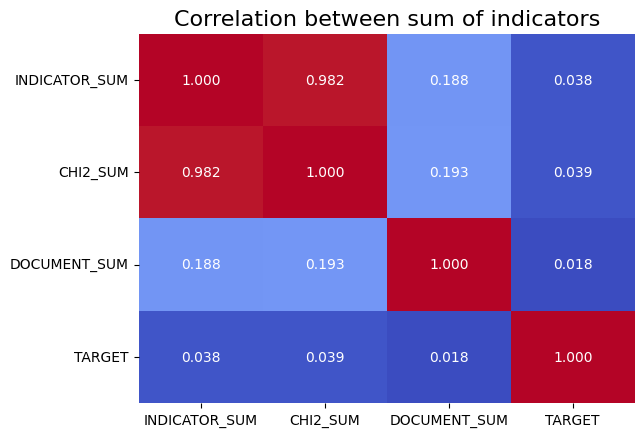

In [88]:
corr_check = application[["INDICATOR_SUM", "CHI2_SUM", 
                          "DOCUMENT_SUM", "TARGET"]].corr(method="spearman")
heatmap = sns.heatmap(corr_check, fmt=".3f", 
                      annot=True, cmap="coolwarm", cbar=None)
heatmap.set_title("Correlation between sum of indicators", fontsize=16);

There is weak correlation betwen the sum of indicators and the target variable. Sum of all indicators and sum of indicators with < 0.05 p-value are almost perfectly correlated.

## Prepare data for modelling

1. All the days columns will become positive. The reason for that is that days columns are negative and applying transformation to them will be more problematic.
2. We will get rid of rare categories in categorical columns

In [89]:
days_columns = application.columns[application.columns.str.startswith("DAYS")]
for column in days_columns:
    application.loc[:, column] = - application[column]
    application_test.loc[:, column] = - application_test[column]

In [90]:
# drop years columns that were created in EDA
columns_to_drop = ["AGE", "YEARS_EMPLOYED"]
application.drop(columns=columns_to_drop, inplace=True);

In [91]:
for dataset in [application, application_test]:
    dataset = helper_functions.remove_rare_categories(dataset)

In [92]:
application.to_csv("application_after_eda.csv")
application_test.to_csv("application_test_after_eda.csv")

## Conclusion from the EDA of Applications table:
1. **Columns with a lot of missing data**. 
    * Big number of columns had more than 50% of missing values. These columns were related to different characteristics of the building where client lives. Considering the irrelevance of these columns, the decision was to drop them, as they could introduce noise to our models.
2. **Financial Situation of Clients:**
    * Several columns related to the financial situation of clients contain a significant number of outliers, some of which were removed
    * Clients who have defaulted tend to have lower incomes on average.
    * There appears to be minimal difference between the annuity, amount of credit, and price of goods columns in relation to the target variable (default risk).
    * Interestingly, the "Price of Goods" column is almost perfectly correlated with "Income."
    * The correlation between numeric features and the target variable (default) is generally weak.
    * A strong association exists between the type of loan and default risk: individuals who took cash loans have a much higher default rate compared to those who took revolving loans.
3. **Employment Status of Clients:**
    * There are notable gaps in data for "Occupation Type," "Organization Type," and "Years of Employment," especially among clients who are unemployed or pensioners.
    * The "Income Type" feature includes categories such as "Businessman" and "Commercial Associate," with the "Commercial Associate" category having over 70,000 occurrences.
    * The occupation group with the highest default risk is "Low-skill Laborers," with a 17% default rate.
    * "Organization Type" also reveals interesting patterns, with some categories differing only by type (e.g., "Business Entity Type 1" vs. "Business Entity Type 2").
    * "Years of Employment" shows promise as a predictor, with clients having longer employment histories generally displaying a significantly lower chance of default.
    * Clients in the medical field tend to have the longest tenures at their current jobs, averaging more than 10 years.
4. **Demographic Factors:**
    * Age plays a significant role in default risk, with younger clients exhibiting a higher likelihood of default. Clients who did not default tend to be older on average.
    * A noteworthy observation is the group of pensioners under 40, who show a default rate exceeding 10%.
    * Gender is another important factor: men have a higher default rate (10%) compared to women (7%).
    * Family status influences default risk as well, with single, separated, or people in civil marriages having higher default rates.
    * Education level is inversely related to default risk; individuals with higher levels of education tend to have a lower chance of default, while those with lower secondary education exhibit the highest default rate.
    * Housing type is associated with default risk: people living in rented apartments or with parents have a higher chance of default.
    * Clients with more children also have a higher likelihood of default.
    * Interestingly, clients from more populated regions tend to have a lower default risk, on average.
5. **Social Surroundings:**
    * While most clients do not have acquaintances involved in late payments or defaults, those who do tend to have a higher risk of default themselves.
6. **Bureau Enquiries:**
    * Bureau enquiries are relatively infrequent, and there is weak correlation between these features and the target variable.
    * Missing data in the bureau enquiry columns often corresponds with the absence of related data in the bureau.csv table, suggesting that these missing values may be due to the clients not being evaluated by the credit bureau.
7. **External Credit Scores:**
    * External score columns show a moderate correlation with the target variable, making them valuable predictors for loan default risk.
    * However, many of these columns contain missing data, particularly for clients who are pensioners or unemployed.
8. **Indicator Columns:**
    * Indicator columns with very low variance were excluded from the analysis, as they provide little to no value for prediction.
    